In [1]:
from yugiquery import *
header('Cards')

<div align='center'>
    <br>
    <!-- Pre Style needed to fix HTML formatting -->
    <pre style="line-height: var(--jp-code-line-height); font-family: var(--jp-code-font-family)">
    ██    ██ ██    ██  ██████  ██  ██████  ██    ██ ███████ ██████  ██    ██ 
     ██  ██  ██    ██ ██       ██ ██    ██ ██    ██ ██      ██   ██  ██  ██  
      ████   ██    ██ ██   ███ ██ ██    ██ ██    ██ █████   ██████    ████   
       ██    ██    ██ ██    ██ ██ ██ ▄▄ ██ ██    ██ ██      ██   ██    ██    
       ██     ██████   ██████  ██  ██████   ██████  ███████ ██   ██    ██    
                                      ▀▀                                     
    </pre>
</div>
<div align='right'>
    Cards - Execution started 16/02/2023 17:34 UTC <br>
    By <b>Guilherme Ruiz</b>
</div>

---

Table of Contents
=================

*   [1  Data aquisition](#Data-aquisition)
    *   [1.1  Fetch online data](#Fetch-online-data)
    *   [1.2  Merge data](#Merge-data)
    *   [1.3  Save data](#Save-data)
*   [3  Check changes](#Check-changes)
    *   [3.1  Load previous data](#Load-previous-data)
    *   [3.2  Generate changelog](#Generate-changelog)
*   [4  Data visualization](#Data-visualization)
    *   [4.1  Full data](#Full-data)
    *   [4.2  Card types](#Card-types)
    *   [4.3  Monsters](#Monsters)
        *   [4.3.1  Attributes](#Attributes)
        *   [4.3.2  Primary types](#Primary-types)
            *   [4.3.2.1  Has effect discrimination](#Has-effect-discrimination)
            *   [4.3.2.2  Is pendulum discrimination](#Is-pendulum-discrimination)
            *   [4.3.2.3  By attribute](#By-attribute)
        *   [4.3.3  Secondary types](#Secondary-types)
            *   [4.3.3.1  By attribute](#By-attribute)
            *   [4.3.3.2  By secondary type](#By-secondary-type)
        *   [4.3.4  Monster types](#Monster-types)
            *   [4.3.4.1  By Attribute](#By-Attribute)
            *   [4.3.4.2  By primary type](#By-primary-type)
            *   [4.3.4.3  By secondary type](#By-secondary-type)
        *   [4.3.5  Effect type](#Effect-type)
        *   [4.3.6  ATK](#ATK)
        *   [4.3.7  DEF](#DEF)
        *   [4.3.8  Level/Rank](#Level/Rank)
            *   [4.3.8.1  ATK statistics](#ATK-statistics)
            *   [4.3.8.2  DEF statistics](#DEF-statistics)
        *   [4.3.9  Pendulum scale](#Pendulum-scale)
            *   [4.3.9.1  ATK statistics](#ATK-statistics)
            *   [4.3.9.2  DEF statistics](#DEF-statistics)
            *   [4.3.9.3  Level/Rank statistics](#Level/Rank-statistics)
        *   [4.3.10  Link](#Link)
            *   [4.3.10.1  ATK statistics](#ATK-statistics)
        *   [4.3.11  Link Arrows](#Link-Arrows)
            *   [4.3.11.1  By combination](#By-combination)
            *   [4.3.11.2  By unique](#By-unique)
            *   [4.3.11.3  By link](#By-link)
    *   [4.4  Spell & Trap](#Spell-&-Trap)
        *   [4.4.1  Properties](#Properties)
        *   [4.4.2  Effect type](#Effect-type)
            *   [4.4.2.1  Spell & Trap discrimination](#Spell-&-Trap-discrimination)
    *   [4.5  Archseries](#Archseries)
        *   [4.5.1  By card type](#By-card-type)
        *   [4.5.2  By primary type](#By-primary-type)
        *   [4.5.3  By secondary type](#By-secondary-type)
        *   [4.5.4  By monster type](#By-monster-type)
        *   [4.5.5  By property](#By-property)
    *   [4.6  Artworks](#Artworks)
        *   [4.6.1  By card type](#By-card-type)
        *   [4.6.2  By primary type](#By-primary-type)
    *   [4.7  Errata](#Errata)
        *   [4.7.1  By card type](#By-card-type)
        *   [4.7.2  By primary type](#By-primary-type)
        *   [4.7.3  By artwork](#By-artwork)
    *   [4.8  TCG & OCG status](#TCG-&-OCG-status)
        *   [4.8.1  TGC status](#TGC-status)
            *   [4.8.1.1  By card type](#By-card-type)
            *   [4.8.1.2  By monster type](#By-monster-type)
            *   [4.8.1.3  By archseries](#By-archseries)
        *   [4.8.2  OCG status](#OCG-status)
            *   [4.8.2.1  By card type](#By-card-type)
            *   [4.8.2.2  By monster type](#By-monster-type)
            *   [4.8.2.3  By archseries](#By-archseries)
        *   [4.8.3  TCG vs. OCG status](#TCG-vs.-OCG-status)
*   [5  Extras](#Extras)
    *   [5.1 Multiple secondary types](#Multiple-secondary-types)
    *   [5.2 Not yet released](#Not-yet-released)
    *   [5.3 Counters and Tokens](#Counters-and-Tokens)
*   [6  Epilogue](#Epilogue)
    *   [6.1  HTML export](#HTML-export)
<!-- *   [6.2  Git](#Git) -->

# Data aquisition

## Fetch online data

In [2]:
# Timestamp
timestamp = pd.Timestamp.now()

In [3]:
# Fetch Monster
monster_df = fetch_monster()

8072 results



In [4]:
# Fetch Spell
spell_df = fetch_st(st='Spell')

# Fetch Trap
trap_df = fetch_st(st='Trap')

2404 results



1827 results



In [5]:
# Fetch Counter
counter_df = fetch_counter()

# Fetch errata
errata_df = fetch_errata()

13 results



1226 results



## Merge data

In [6]:
# Merge errata
monster_with_token_df = merge_errata(monster_df, errata_df, drop=True)
spell_df = merge_errata(spell_df, errata_df, drop=True)
trap_df = merge_errata(trap_df, errata_df, drop=True)
counter_df = merge_errata(counter_df, errata_df, drop=True)

# Separate tokens from monsters
token_df = monster_with_token_df[monster_with_token_df['Primary type']=='Monster Token']
monster_df = monster_with_token_df[monster_with_token_df['Primary type']!='Monster Token']

# Add tokens to counters data frame
counter_df = pd.concat([counter_df, token_df], ignore_index=True, axis=0).sort_values('Name').reset_index(drop=True)

# Create combined spell and trap data frame
st_df = pd.concat([spell_df, trap_df], ignore_index=True, axis=0).sort_values('Name').reset_index(drop=True)

# Create combined monster, spell and trap data frames
cards_df = pd.concat([st_df, monster_df], ignore_index=True, axis=0).sort_values('Name').reset_index(drop=True)

# Create combined data frames with full data
full_df = pd.concat([cards_df, counter_df], ignore_index=True, axis=0).sort_values('Name').reset_index(drop=True)

print('Data merged')

Data merged


## Save data

In [7]:
full_df.to_csv(f'../data/all_cards_{timestamp.isoformat(timespec="minutes")}.csv', index = False)
print('Data saved')

Data saved


# Check changes

## Load previous data

In [8]:
# Get list of files
files_list = sorted(glob.glob('../data/all_cards_*.csv'), key=os.path.getctime, reverse=True)
# Get second newest file if exist
if len(files_list)>1:
    # Load csv avoiding converting "NA" to NaN
    previous_df = pd.read_csv(files_list[1], dtype=object, keep_default_na=False, na_values=[''])
    # Correct tuples
    previous_df['Primary type'] = previous_df['Secondary type'].dropna().apply(literal_eval)
    previous_df['Effect type'] = previous_df['Effect type'].dropna().apply(literal_eval)
    previous_df['Link Arrows'] = previous_df['Link Arrows'].dropna().apply(literal_eval)
    previous_df['Archseries'] = previous_df['Archseries'].dropna().apply(literal_eval)
    previous_df['Artwork'] = previous_df['Artwork'].dropna().apply(literal_eval)
    previous_df['Errata'] = previous_df['Errata'].dropna().apply(literal_eval)
    # Force dtypes to match current df
    previous_df = previous_df.astype(full_df[previous_df.columns].dtypes.to_dict())
    previous_ts = pd.to_datetime(os.path.basename(files_list[1]).split('_')[-1].rstrip('.csv'))
    print('File loaded')
else:
    previous_df = None
    print('No older files')

File loaded


## Generate changelog

In [9]:
if previous_df is None:
    print('Skipped')
else:
    changelog = generate_changelog(previous_df, full_df, col = 'Name')
    if not changelog.empty:
        display(changelog)
        changelog.to_csv(f'../data/cards_changelog_{timestamp.isoformat(timespec="minutes")}_{previous_ts.isoformat(timespec="minutes")}.csv', index = True)
        print('Changelog saved')

Password  \
Name                                   
3-Hump Lacooda              86988864   
3-Hump Lacooda              86988864   
30,000-Year White Turtle    11714098   
30,000-Year White Turtle    11714098   
4-Starred Ladybug of Doom   83994646   
...                              ...   
Zuijin of the Ice Barrier   43256007   
Zure, Knight of Dark World  07459013   
Zure, Knight of Dark World  07459013   
Zushin the Sleeping Giant   67547370   
Zushin the Sleeping Giant   67547370   

                                                                  Effect type  \
Name                                                                            
3-Hump Lacooda                                             (Ignition Effect,)   
3-Hump Lacooda                                             (Ignition Effect,)   
30,000-Year White Turtle                                                  NaN   
30,000-Year White Turtle                                                  NaN   
4-Starred Ladybug of Doom                                      (Flip effect,)   
...                                                                       ...   
Zuijin of the Ice Barrier                        (Condition, Ignition Effect)   
Zure, Knight of Dark World                                                NaN   
Zure, Knight of Dark World                                                NaN   
Zushin the Sleeping Giant   (Continuous Effect, Ignition Effect, Summoning...   
Zushin the Sleeping Giant   (Continuous Effect, Ignition Effect, Summoning...   

                           TCG status Artwork  \
Name                                            
3-Hump Lacooda              Unlimited     NaN   
3-Hump Lacooda              Unlimited     NaN   
30,000-Year White Turtle          NaN     NaN   
30,000-Year White Turtle          NaN     NaN   
4-Starred Ladybug of Doom   Unlimited     NaN   
...                               ...     ...   
Zuijin of the Ice Barrier   Unlimited     NaN   
Zure, Knight of Dark World  Unlimited     NaN   
Zure, Knight of Dark World  Unlimited     NaN   
Zushin the Sleeping Giant   Unlimited     NaN   
Zushin the Sleeping Giant   Unlimited     NaN   

                                                                     Page URL  \
Name                                                                            
3-Hump Lacooda                      https://yugipedia.com/wiki/3-Hump_Lacooda   
3-Hump Lacooda                      https://yugipedia.com/wiki/3-Hump_Lacooda   
30,000-Year White Turtle    https://yugipedia.com/wiki/30,000-Year_White_T...   
30,000-Year White Turtle    https://yugipedia.com/wiki/30,000-Year_White_T...   
4-Starred Ladybug of Doom   https://yugipedia.com/wiki/4-Starred_Ladybug_o...   
...                                                                       ...   
Zuijin of the Ice Barrier   https://yugipedia.com/wiki/Zuijin_of_the_Ice_B...   
Zure, Knight of Dark World  https://yugipedia.com/wiki/Zure,_Knight_of_Dar...   
Zure, Knight of Dark World  https://yugipedia.com/wiki/Zure,_Knight_of_Dar...   
Zushin the Sleeping Giant   https://yugipedia.com/wiki/Zushin_the_Sleeping...   
Zushin the Sleeping Giant   https://yugipedia.com/wiki/Zushin_the_Sleeping...   

                             Modification date Errata     Primary type  \
Name                                                                     
3-Hump Lacooda             2022-03-31 12:34:57    NaN              NaN   
3-Hump Lacooda             2022-03-31 12:34:57    NaN   Effect Monster   
30,000-Year White Turtle   2022-04-27 07:30:34    NaN              NaN   
30,000-Year White Turtle   2022-04-27 07:30:34    NaN   Normal Monster   
4-Starred Ladybug of Doom  2022-03-31 12:41:11    NaN  (Flip monster,)   
...                                        ...    ...              ...   
Zuijin of the Ice Barrier  2021-12-07 13:55:49    NaN   Effect Monster   
Zure, Knight of Dark World 2022-12-01 16:13:43    NaN              NaN   
Zure, Knight of Dark 

Changelog saved


# Data visualization

## Full data

In [10]:
full_df

Name  Password     Card type  \
0           "A" Cell Breeding Device  34541863    Spell Card   
1                 "A" Cell Incubator  64163367    Spell Card   
2      "A" Cell Recombination Device  91231901    Spell Card   
3             "A" Cell Scatter Burst  73262676    Spell Card   
4       "Infernoble Arms - Durendal"  37478723    Spell Card   
...                              ...       ...           ...   
12312                  Zubaba Knight  97896503  Monster Card   
12313        Zubababancho Gagagacoat  23720856  Monster Card   
12314      Zuijin of the Ice Barrier  43256007  Monster Card   
12315     Zure, Knight of Dark World  07459013  Monster Card   
12316      Zushin the Sleeping Giant  67547370  Monster Card   

                    Property        Archseries  \
0      Continuous Spell Card               NaN   
1      Continuous Spell Card               NaN   
2      Quick-Play Spell Card               NaN   
3      Quick-Play Spell Card               NaN   
4           Equip Spell Card     (Noble Arms,)   
...                      ...               ...   
12312                    NaN         (Zubaba,)   
12313                    NaN  (Gagaga, Zubaba)   
12314                    NaN    (Ice Barrier,)   
12315                    NaN     (Dark World,)   
12316                    NaN               NaN   

                                             Effect type TCG status  \
0                                      (Trigger Effect,)  Unlimited   
1               (Continuous-like Effect, Trigger Effect)  Unlimited   
2                         (Effect, Ignition-like Effect)  Unlimited   
3                                              (Effect,)  Unlimited   
4      (Condition, Ignition-like Effect, Trigger Effect)  Unlimited   
...                                                  ...        ...   
12312                                  (Trigger Effect,)  Unlimited   
12313                       (Condition, Ignition Effect)  Unlimited   
12314                       (Condition, Ignition Effect)  Unlimited   
12315                                                NaN  Unlimited   
12316  (Continuous Effect, Ignition Effect, Summoning...  Unlimited   

      OCG status                                           Page URL Artwork  \
0      Unlimited  https://yugipedia.com/wiki/%22A%22_Cell_Breedi...     NaN   
1      Unlimited  https://yugipedia.com/wiki/%22A%22_Cell_Incubator     NaN   
2      Unlimited  https://yugipedia.com/wiki/%22A%22_Cell_Recomb...     NaN   
3      Unlimited  https://yugipedia.com/wiki/%22A%22_Cell_Scatte...     NaN   
4      Unlimited  https://yugipedia.com/wiki/%22Infernoble_Arms_...     NaN   
...          ...                                                ...     ...   
12312  Unlimited           https://yugipedia.com/wiki/Zubaba_Knight     NaN   
12313  Unlimited  https://yugipedia.com/wiki/Zubababancho_Gagaga...     NaN   
12314  Unlimited  https://yugipedia.com/wiki/Zuijin_of_the_Ice_B...     NaN   
12315  Unlimited  https://yugipedia.com/wiki/Zure,_Knight_of_Dar...     NaN   
12316  Unlimited  https://yugipedia.com/wiki/Zushin_the_Sleeping...     NaN   

        Modification date   Errata Attribute    Primary type Secondary type  \
0     2021-11-06 13:57:15  (Name,)       NaN             NaN            NaN   
1     2022-06-13 04:27:51      NaN       NaN             NaN            NaN   
2     2020-03-12 22:40:14      NaN       NaN             NaN            NaN   
3     2021-11-06 13:58:32      NaN       NaN             NaN            NaN   
4     2023-01-28 17:19:31      NaN       NaN             NaN            NaN   
...                   ...      ...       ...             ...            ...   
12312 2023-02-12 23:14:21      NaN     EARTH  Effect Monster            NaN   
12313 2023-02-12 23:24:40      NaN     EARTH  Effect Monster            NaN   
12314 2021-12-07 13:55:49      NaN     WATER  Effect Monster            NaN   
12315 2022-12-01 16:13:43      NaN      DARK  Normal Monster          

Full data available to download [here](../data)

## Card types

In [11]:
cards_df.groupby('Card type').nunique()

Name  Password  Property  Archseries  Effect type  TCG status  \
Card type                                                                     
Monster Card  8026      7963         0        1004          225           6   
Spell Card    2402      2386         6         402          116           6   
Trap Card     1827      1812         3         327           95           6   

              OCG status  Page URL  Artwork  Modification date  Errata  \
Card type                                                                
Monster Card           6      8034        3               7985       3   
Spell Card             6      2404        3               2390       3   
Trap Card              5      1827        2               1820       3   

              Attribute  Primary type  Secondary type  Monster type  \
Card type                                                             
Monster Card          7             7               8            25   
Spell Card            0             0               0             0   
Trap Card             0             0               0             0   

              Level/Rank  DEF  Pendulum Scale  Link  Link Arrows  ATK  
Card type                                                              
Monster Card          14   77              13     6           62   82  
Spell Card             0    0               0     0            0    0  
Trap Card              0    0               0     0            0    0

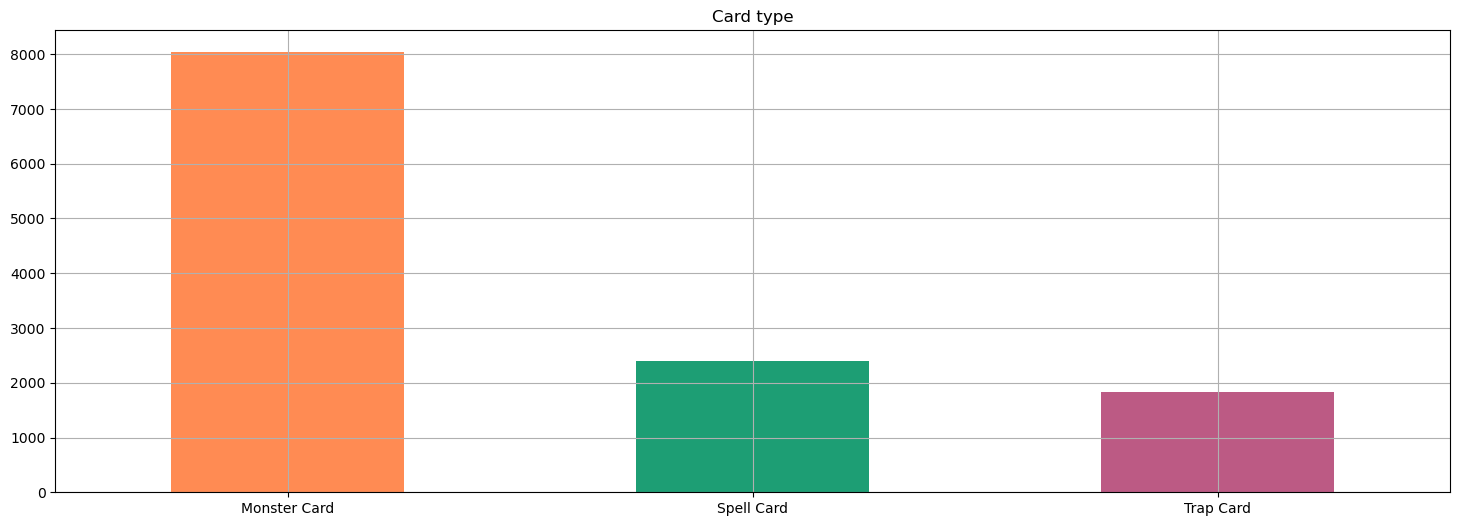

In [12]:
card_type_colors = [colors_dict[i] for i in full_df['Card type'].value_counts().index]
cards_df['Card type'].value_counts().plot.bar(figsize = (18,6), grid = True, rot=0, color = card_type_colors, title = 'Card type')
plt.show()

## Monsters

### Attributes

In [13]:
print('Total number of attributes:', monster_df['Attribute'].nunique())

Total number of attributes: 7


In [14]:
monster_df.drop(columns=['Card type']).groupby('Attribute').nunique()

Name  Password  Archseries  Primary type  Secondary type  \
Attribute                                                             
DARK       2229      2213         457             7               7   
DIVINE        6         0           3             1               0   
EARTH      1880      1873         332             7               6   
FIRE        672       668         188             7               7   
LIGHT      1635      1611         391             7               7   
WATER       838       836         208             7               6   
WIND        766       762         217             7               6   

           Monster type  Effect type  Level/Rank  DEF  Pendulum Scale  Link  \
Attribute                                                                     
DARK                 23          155          13   63              12     6   
DIVINE                2            6           2    3               0     0   
EARTH                23          127          12   60              12     4   
FIRE                 22           85          12   40               8     4   
LIGHT                23          134          14   50              10     5   
WATER                22           93          12   41               9     4   
WIND                 23          105          12   38              11     4   

           Link Arrows  ATK  TCG status  OCG status  Page URL  Artwork  \
Attribute                                                                
DARK                42   70           6           6      2232        3   
DIVINE               0    3           2           2         9        1   
EARTH               29   71           5           5      1882        3   
FIRE                22   43           3           5       672        3   
LIGHT               30   58           5           5      1635        3   
WATER               16   57           4           6       838        3   
WIND                14   46           6           6       766        3   

           Modification date  Errata  
Attribute                             
DARK                    2226       3  
DIVINE                     9       3  
EARTH                   1876       3  
FIRE                     670       3  
LIGHT                   1630       3  
WATER                    837       3  
WIND                     763       3

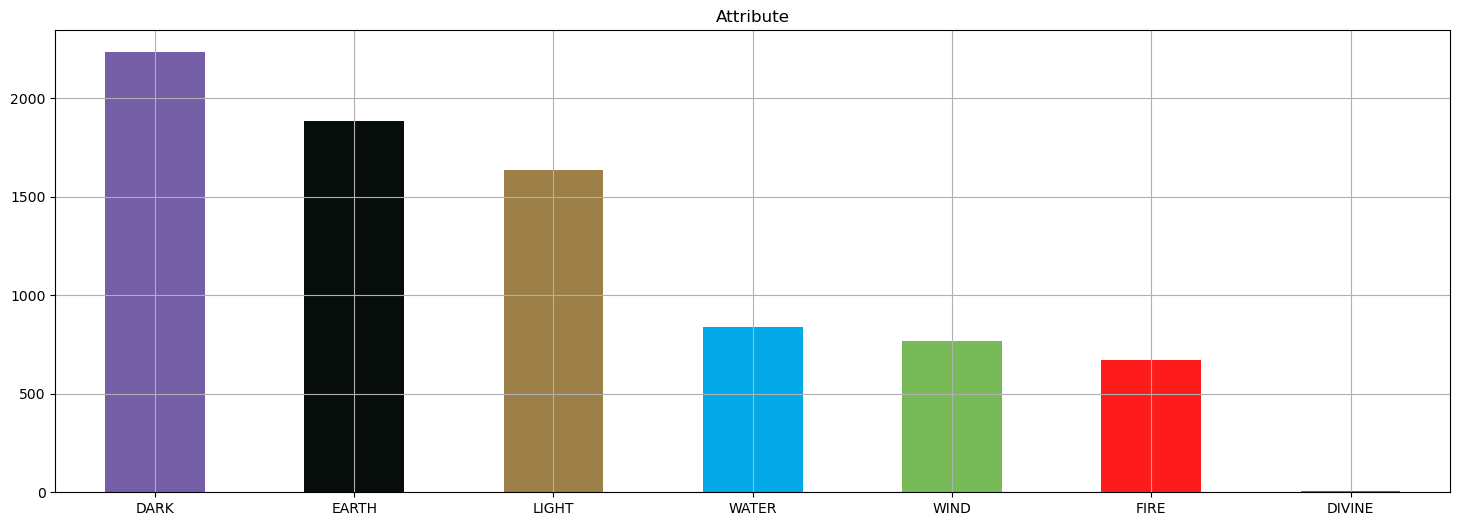

In [15]:
attribute_colors = [colors_dict[i] for i in monster_df['Attribute'].value_counts().index]
monster_df['Attribute'].value_counts().plot.bar(figsize = (18,6), grid = True, rot=0, color = attribute_colors, title = 'Attribute')
plt.show()

### Primary types

In [16]:
print('Total number of primary types:', monster_df['Primary type'].nunique())

Total number of primary types: 7


In [17]:
monster_df.drop(columns=['Card type']).groupby('Primary type').nunique()

Name  Password  Archseries  Attribute  Secondary type  \
Primary type                                                             
Effect Monster   5467      5436         782          7               8   
Fusion Monster    436       432         142          6               1   
Link Monster      375       368         139          6               0   
Normal Monster    708       702         110          6               1   
Ritual Monster    126       120          38          6               3   
Synchro Monster   422       417         161          6               1   
Xyz Monster       496       488         194          6               0   

                 Monster type  Effect type  Level/Rank  DEF  Pendulum Scale  \
Primary type                                                                  
Effect Monster             25          205          12   66              13   
Fusion Monster             23           68          12   46               4   
Link Monster               23           52           0    0               0   
Normal Monster             23            6           8   48              10   
Ritual Monster             15           33          12   26               1   
Synchro Monster            23           57          13   38               4   
Xyz Monster                23           70          14   42               5   

                 Link  Link Arrows  ATK  TCG status  OCG status  Page URL  \
Primary type                                                                
Effect Monster      0            0   73           6           6      5467   
Fusion Monster      0            0   48           4           5       436   
Link Monster        6           62   39           5           6       375   
Normal Monster      0            0   58           3           4       709   
Ritual Monster      0            0   35           2           2       126   
Synchro Monster     0            0   41           5           5       422   
Xyz Monster         0            0   51           6           5       496   

                 Artwork  Modification date  Errata  
Primary type                                         
Effect Monster         3               5440       3  
Fusion Monster         3                435       3  
Link Monster           3                373       2  
Normal Monster         3                709       3  
Ritual Monster         1                126       3  
Synchro Monster        2                422       3  
Xyz Monster            2                494       3

#### Has effect discrimination

In [18]:
has_effect = monster_df['Primary type'].where(monster_df['Effect type'].notna()).value_counts().rename('Effect')
no_effect = monster_df['Primary type'].where(monster_df['Effect type'].isna()).value_counts().rename('No Effect')
effect = pd.concat([has_effect,no_effect], axis=1).fillna(0).astype(int)
effect

Effect  No Effect
Effect Monster     5467          0
Xyz Monster         494          2
Synchro Monster     419          3
Fusion Monster      375         61
Link Monster        370          5
Ritual Monster      111         15
Normal Monster       34        676

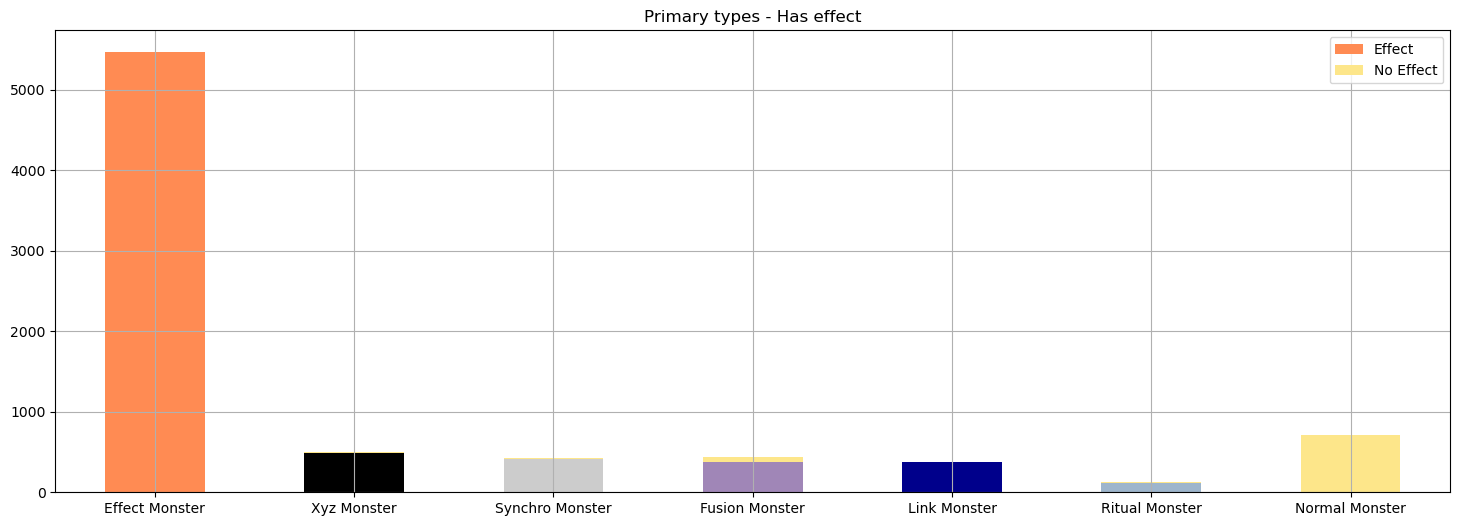

In [19]:
monster_type_colors = {'No Effect': colors_dict['Normal Monster'], 'Effect': [colors_dict[i] for i in effect.index]}
effect.plot.bar(figsize = (18,6), stacked = True, grid = True, rot=0,  legend=True, color = monster_type_colors, title = 'Primary types - Has effect')
# plt.yscale('log')
plt.show()

Obs: Normal monster can have effect if it is pendulum

#### Is pendulum discrimination

In [20]:
not_pendulum = monster_df['Primary type'].where(monster_df['Pendulum Scale'].isna()).value_counts().rename('Not Pendulum')
is_pendulum = monster_df['Primary type'].where(monster_df['Pendulum Scale'].notna()).value_counts().rename('Pendulum')
pendulum = pd.concat([not_pendulum,is_pendulum], axis=1).fillna(0).astype(int)
pendulum

Not Pendulum  Pendulum
Effect Monster           5199       268
Normal Monster            672        38
Xyz Monster               487         9
Fusion Monster            426        10
Synchro Monster           415         7
Link Monster              375         0
Ritual Monster            125         1

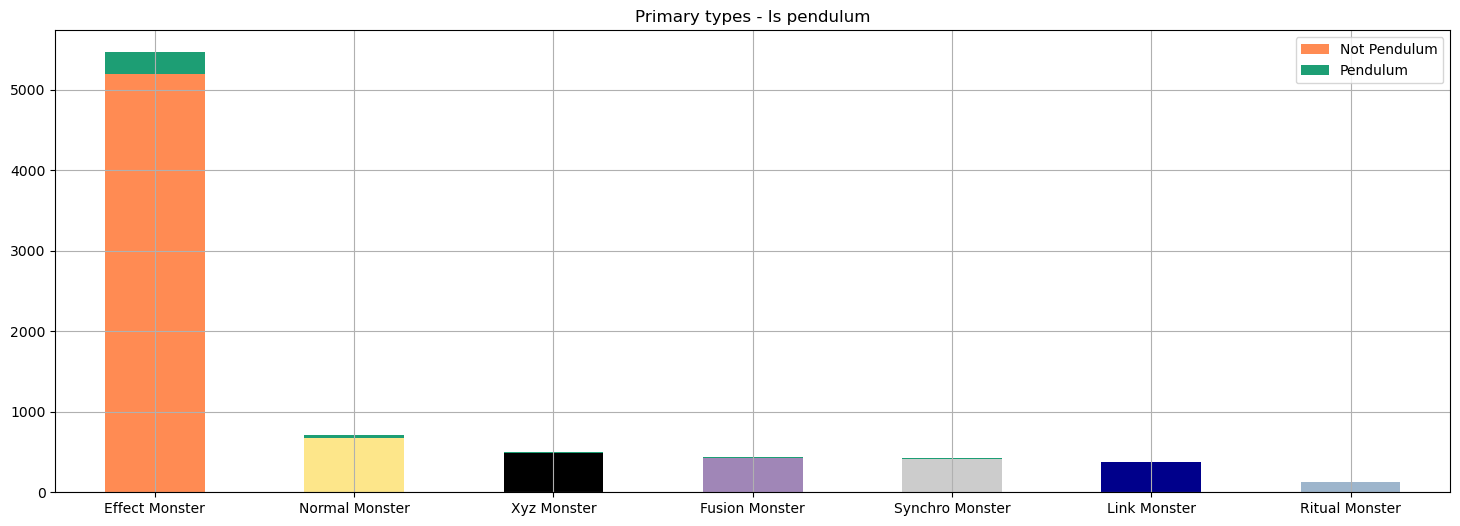

In [21]:
monster_type_colors_b = {'Pendulum': colors_dict['Pendulum Monster'], 'Not Pendulum': [colors_dict[i] for i in pendulum.index]}
pendulum.plot.bar(figsize = (18,6), stacked = True, grid = True, rot=0, color = monster_type_colors_b, legend=True, title = 'Primary types - Is pendulum')
plt.show()

#### By attribute

In [22]:
primmary_crosstab = pd.crosstab(cards_df['Primary type'],cards_df['Attribute'])
primmary_crosstab

Attribute        DARK  DIVINE  EARTH  FIRE  LIGHT  WATER  WIND
Primary type                                                  
Effect Monster   1496       6   1311   459   1108    555   532
Fusion Monster    150       0     83    34     99     35    35
Link Monster      125       0     76    33     87     29    25
Normal Monster    174       0    242    51     73    106    64
Ritual Monster     42       0     17     7     34     20     6
Synchro Monster   111       0     70    50     80     37    74
Xyz Monster       135       0     83    38    154     56    30

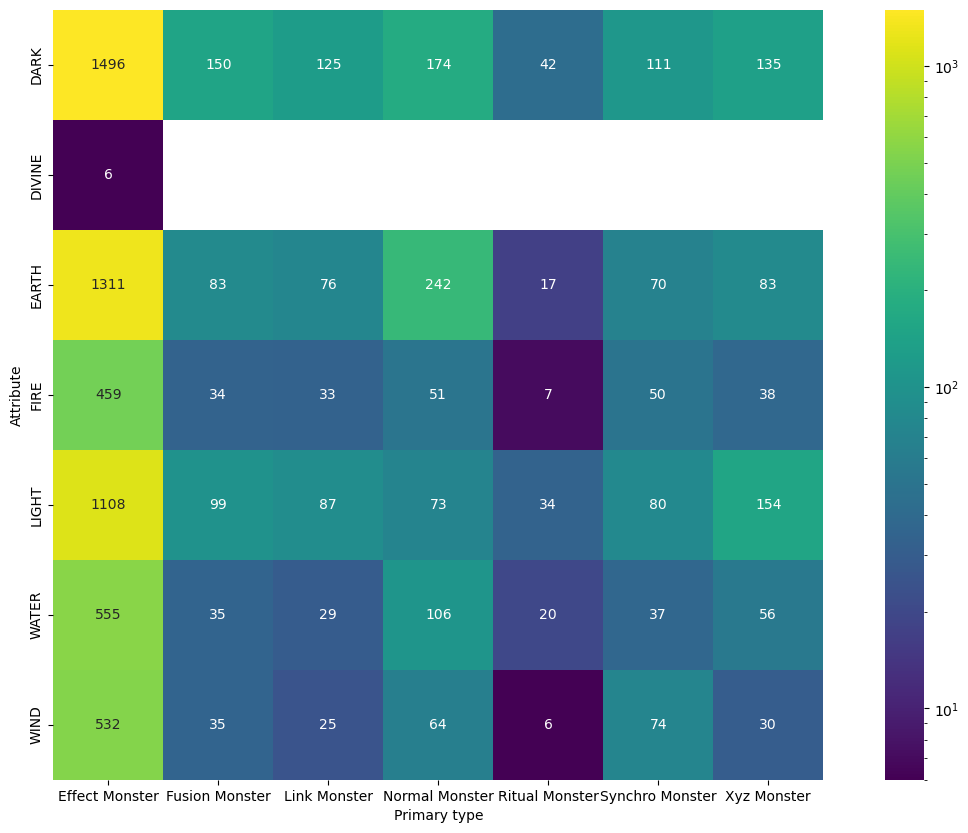

In [23]:
plt.figure(figsize = (16,10))
sns.heatmap(primmary_crosstab.T, annot=True, fmt="g", cmap='viridis', square=True, norm=mc.LogNorm())
plt.show()

### Secondary types

In [24]:
exploded_secondary_type = monster_df.explode('Secondary type')
print('Total number of secondary types:', exploded_secondary_type['Secondary type'].nunique())

Total number of secondary types: 6


In [25]:
exploded_secondary_type.drop(columns=['Card type', 'Link', 'Link Arrows']).groupby('Secondary type').nunique()

Name  Password  Archseries  Attribute  Primary type  \
Secondary type                                                        
Flip monster     186       184          46          6             2   
Gemini monster    45        45          13          6             1   
Spirit monster    39        39           4          6             2   
Toon monster      17        17          13          6             1   
Tuner monster    487       484         138          6             5   
Union monster     37        37           9          6             1   

                Monster type  Effect type  Level/Rank  DEF  Pendulum Scale  \
Secondary type                                                               
Flip monster              19           20          12   33               1   
Gemini monster            18            6           8   19               0   
Spirit monster            13            8          10   20               2   
Toon monster               7            8           5   15               0   
Tuner monster             23           62           9   32               7   
Union monster              9            6           8   14               0   

                ATK  TCG status  OCG status  Page URL  Artwork  \
Secondary type                                                   
Flip monster     38           3           5       186        1   
Gemini monster   17           1           1        45        0   
Spirit monster   22           1           2        39        1   
Toon monster     12           1           2        17        1   
Tuner monster    32           3           4       487        3   
Union monster    17           1           1        37        1   

                Modification date  Errata  
Secondary type                             
Flip monster                  186       3  
Gemini monster                 45       3  
Spirit monster                 39       1  
Toon monster                   17       2  
Tuner monster                 487       3  
Union monster                  37       2

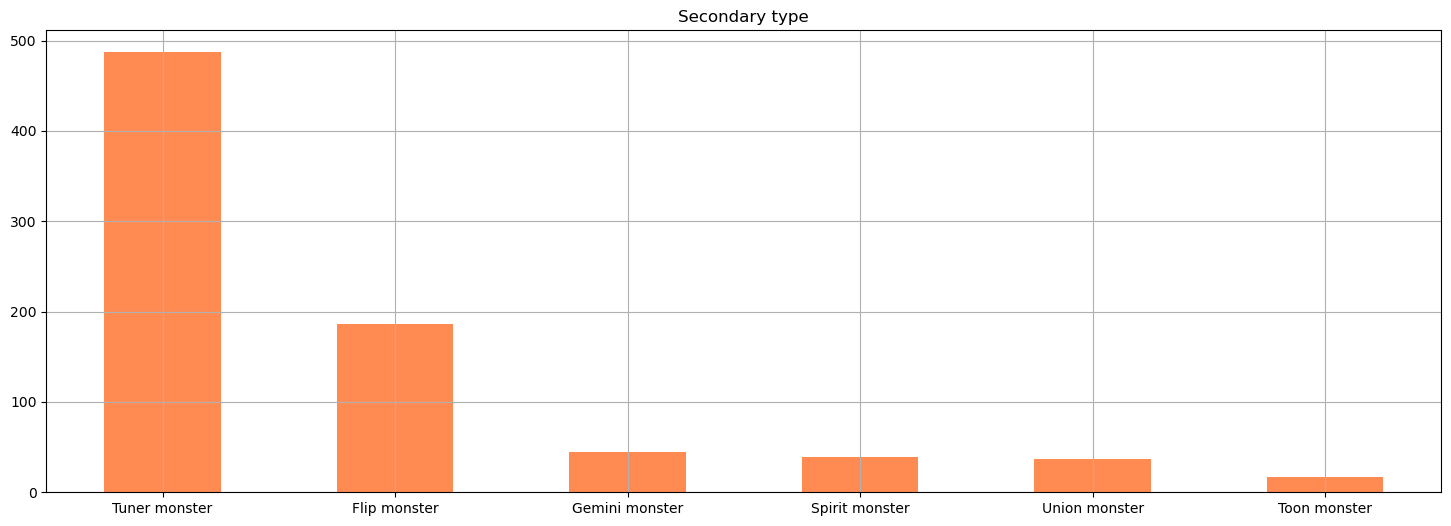

In [26]:
secondary_type_colors = colors_dict['Effect Monster']
exploded_secondary_type['Secondary type'].value_counts().plot.bar(figsize = (18,6), stacked = True, grid = True, rot=0, color = secondary_type_colors, legend=False, title = 'Secondary type')
plt.show()

#### By attribute

In [27]:
secondary_crosstab = pd.crosstab(exploded_secondary_type['Secondary type'],exploded_secondary_type['Attribute'])
secondary_crosstab

Attribute       DARK  EARTH  FIRE  LIGHT  WATER  WIND
Secondary type                                       
Flip monster      51     62    10     33     13    17
Gemini monster    11      8     8      6      8     4
Spirit monster     5      6     6      5      6    11
Toon monster       7      5     1      2      1     1
Tuner monster    126     94    45     99     53    70
Union monster      6      9     3     12      4     3

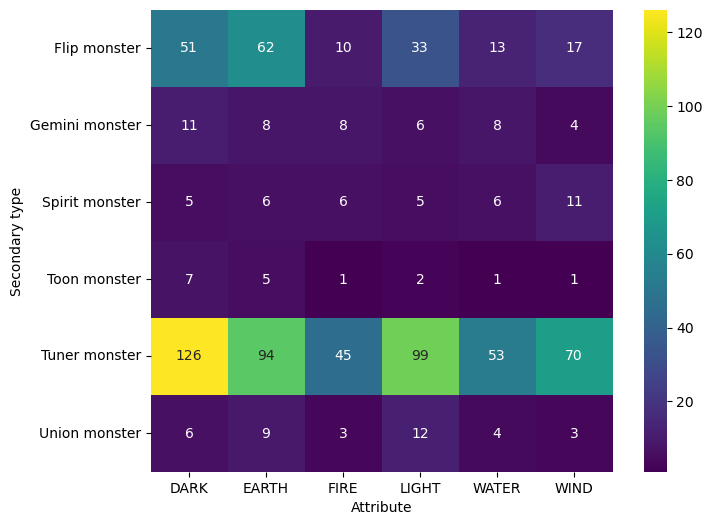

In [28]:
plt.figure(figsize = (8,6))
sns.heatmap(secondary_crosstab[secondary_crosstab>0], annot=True, fmt="g", cmap='viridis', square=True)
plt.show()

#### By secondary type

In [29]:
secondary_crosstab_b = pd.crosstab(exploded_secondary_type['Primary type'],exploded_secondary_type['Secondary type'], margins = True)
secondary_crosstab_b

Secondary type   Flip monster  Gemini monster  Spirit monster  Toon monster  \
Primary type                                                                  
Effect Monster            185              45              37            17   
Fusion Monster              0               0               0             0   
Normal Monster              0               0               0             0   
Ritual Monster              1               0               2             0   
Synchro Monster             0               0               0             0   
All                       186              45              39            17   

Secondary type   Tuner monster  Union monster  All  
Primary type                                        
Effect Monster             440             37  761  
Fusion Monster               3              0    3  
Normal Monster              12              0   12  
Ritual Monster               2              0    5  
Synchro Monster             30              0   30  
All                        487             37  811

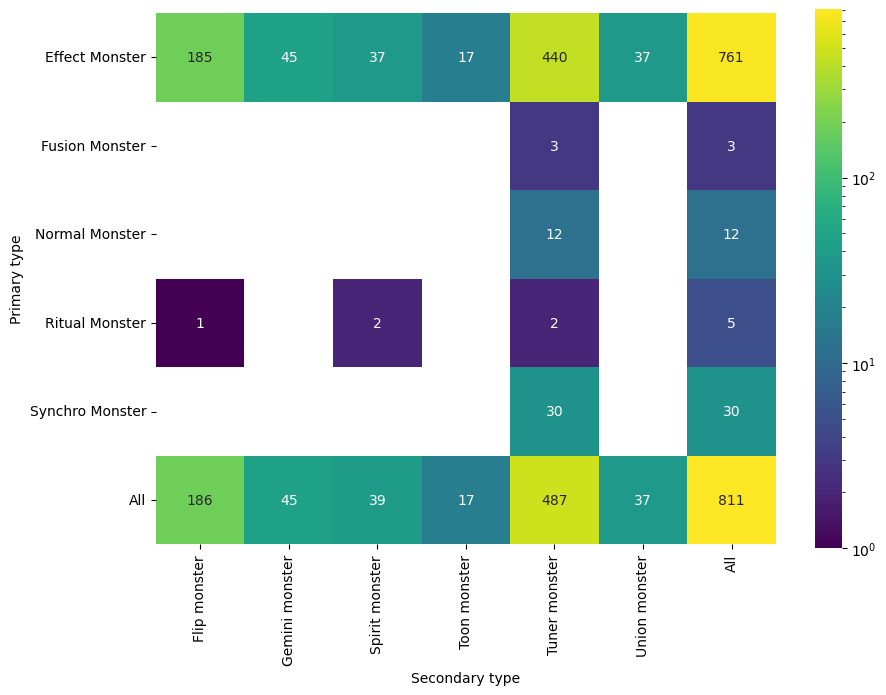

In [30]:
plt.figure(figsize = (10,7))
sns.heatmap(secondary_crosstab_b, annot=True, fmt="g", cmap='viridis', square=True, norm=mc.LogNorm())
plt.show()

### Monster types

In [31]:
print('Total number of monster types:', monster_df['Monster type'].nunique())

Total number of monster types: 25


In [32]:
monster_df.drop(columns=['Card type']).groupby('Monster type').nunique()

Name  Password  Archseries  Attribute  Primary type  \
Monster type                                                         
Aqua            254       254          65          6             7   
Beast           374       371          85          6             7   
Beast-Warrior   242       235          48          6             7   
Creator God       1         0           1          1             1   
Cyberse         255       254          35          6             7   
Dinosaur        126       121          26          6             6   
Divine-Beast      5         0           2          1             1   
Dragon          662       657         186          6             7   
Fairy           516       511         115          6             7   
Fiend           759       757         148          6             7   
Fish            128       128          21          5             7   
Insect          253       252          39          6             7   
Machine         927       921         167          6             7   
Plant           234       233          39          6             6   
Psychic         180       179          43          6             6   
Pyro            122       122          35          5             6   
Reptile         171       171          35          6             6   
Rock            246       245          73          6             7   
Sea Serpent      82        82          28          6             6   
Spellcaster     679       671         150          6             7   
Thunder         129       128          34          6             6   
Warrior        1037      1030         220          6             7   
Winged Beast    314       312          66          6             7   
Wyrm             89        88          20          6             6   
Zombie          241       241          35          6             7   

               Secondary type  Effect type  Level/Rank  DEF  Pendulum Scale  \
Monster type                                                                  
Aqua                        6           51          10   33               3   
Beast                       4           60          10   38               7   
Beast-Warrior               3           57          10   31               6   
Creator God                 0            1           1    1               0   
Cyberse                     1           45          11   29               1   
Dinosaur                    1           36          11   32               4   
Divine-Beast                0            5           1    3               0   
Dragon                      6          108          13   48               9   
Fairy                       5           83          12   38               9   
Fiend                       6          107          13   45              12   
Fish                        2           31          10   28               1   
Insect                      3           59          12   33               2   
Machine                     7          113          12   55               9   
Plant                       4           38           9   30               5   
Psychic                     2           43          11   31               5   
Pyro                        5           37          11   30               0   
Reptile                     3           46          11   30               3   
Rock                        4           59          11   40               4   
Sea Serpent                 3           32          10   26               1   
Spellcaster                 6          100          12   42              11   
Thunder                     4           38          10   29               1   
Warrior                     6           92          13   41               6   
Winged Beast                5           61          10   29               4   
Wyrm                        1           33          11   24               3   
Zombie                      6           52          11   37           

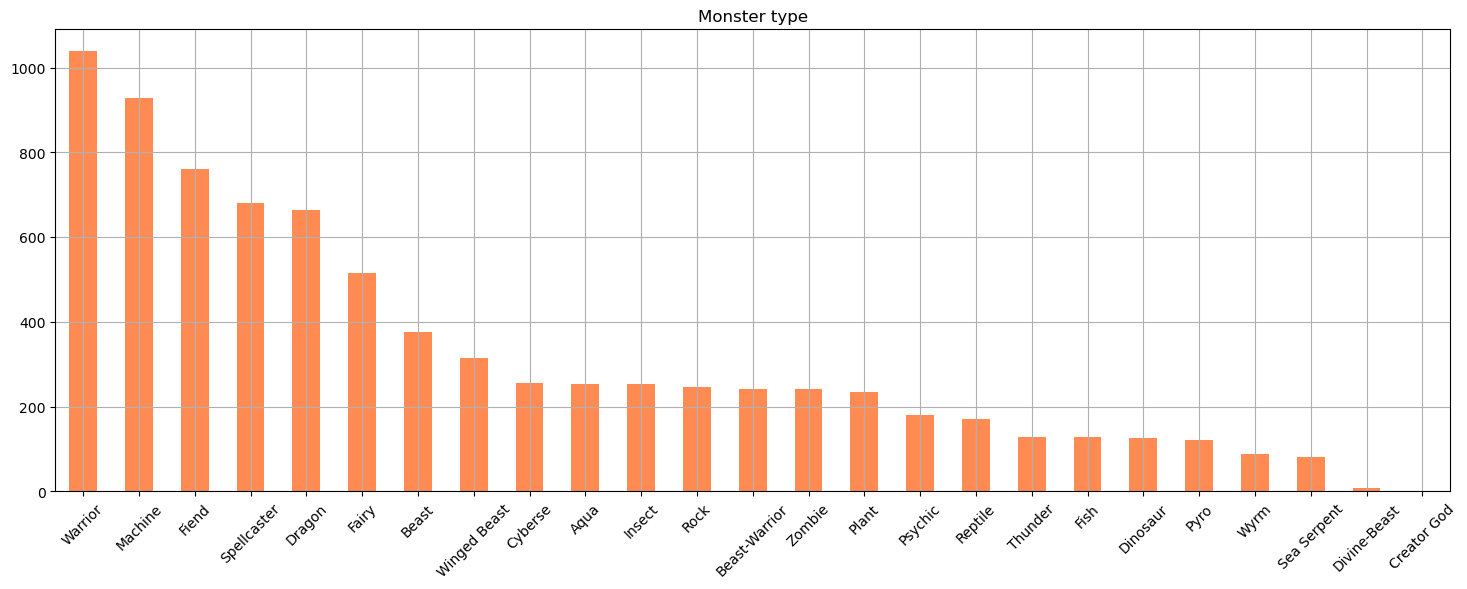

In [33]:
monster_type_colors = colors_dict['Monster Card']
monster_df['Monster type'].value_counts().plot.bar(figsize = (18,6), grid = True, rot=45, color = monster_type_colors, title = 'Monster type')
plt.show()

#### By Attribute

In [34]:
monster_crosstab = pd.crosstab(cards_df['Monster type'],cards_df['Attribute'], dropna=False)
monster_crosstab

Attribute      DARK  DIVINE  EARTH  FIRE  LIGHT  WATER  WIND
Monster type                                                
Aqua              9       0      6    10      4    219     6
Beast            37       0    210    16     73     14    25
Beast-Warrior    40       0     83    54     34     16    15
Creator God       0       1      0     0      0      0     0
Cyberse          72       0     36    44     62     28    13
Dinosaur         11       0     60    34      5      9     7
Divine-Beast      0       8      0     0      0      0     0
Dragon          257       0     47    48    170     28   113
Fairy            58       0     63    18    325     27    25
Fiend           571       0     34    46     70     24    16
Fish              2       0      2     0      1    121     2
Insect           41       0    135     6     21      4    46
Machine         227       0    316    52    169     48   115
Plant            42       0    122    11     22     24    13
Psychic          23       0     37    17     47     13    43
Pyro              3       0      6   106      4      0     3
Reptile          38       0     34    15     45     35     4
Rock             16       0    199     5     14      5     7
Sea Serpent       3       0      1     1      2     71     4
Spellcaster     280       0     53    28    194     63    62
Thunder          14       0     10     5     77      4    19
Warrior         203       0    364   103    251     53    64
Winged Beast    112       0      7    16     15     12   152
Wyrm             15       0     19    12     23     12     8
Zombie          159       0     38    25      7      8     4

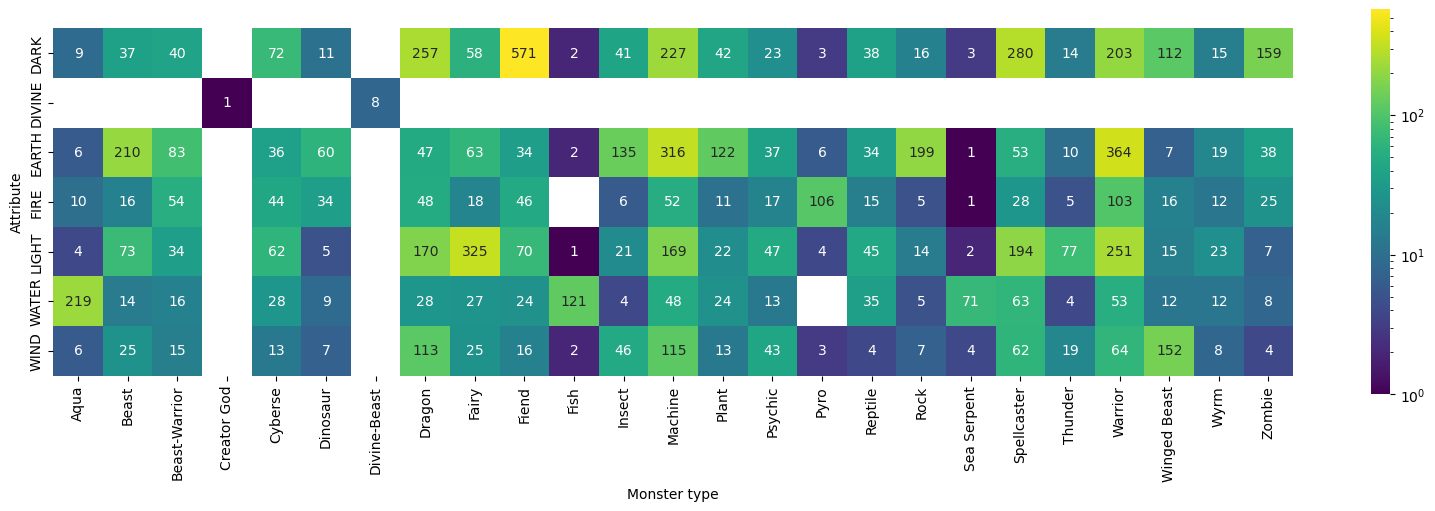

In [35]:
plt.figure(figsize = (20,5))
sns.heatmap(monster_crosstab[monster_crosstab>0].T, annot=True, fmt="g", cmap='viridis', square=True, norm=mc.LogNorm())
plt.show()

#### By primary type

In [36]:
monster_crosstab_b = pd.crosstab(cards_df['Monster type'],cards_df['Primary type'], dropna=False)
monster_crosstab_b

Primary type   Effect Monster  Fusion Monster  Link Monster  Normal Monster  \
Monster type                                                                  
Aqua                      154              11             3              57   
Beast                     273              17             9              50   
Beast-Warrior             165              11             9              21   
Creator God                 1               0             0               0   
Cyberse                   126               5            98               5   
Dinosaur                   89               8             3              17   
Divine-Beast                5               0             0               0   
Dragon                    348              64            33              46   
Fairy                     370              22            25              32   
Fiend                     536              46            28              72   
Fish                       92               5             1              17   
Insect                    186               5            10              29   
Machine                   648              47            39              61   
Plant                     163               6            15              24   
Psychic                   123              11             5               9   
Pyro                       85               8             2              18   
Reptile                   140               2             3              18   
Rock                      169              18             4              27   
Sea Serpent                55               2             2               8   
Spellcaster               513              26            26              54   
Thunder                    98               8             5              10   
Warrior                   681              96            29              78   
Winged Beast              228               9            10              26   
Wyrm                       56               2             9               3   
Zombie                    163               7             7              28   

Primary type   Ritual Monster  Synchro Monster  Xyz Monster  
Monster type                                                 
Aqua                        8                4           17  
Beast                       1               14           11  
Beast-Warrior               5                8           23  
Creator God                 0                0            0  
Cyberse                     7                5            9  
Dinosaur                    0                5            4  
Divine-Beast                0                0            0  
Dragon                     15               96           61  
Fairy                      17               18           32  
Fiend                      15               24           40  
Fish                        1                9            3  
Insect                      1                8           14  
Machine                     4               63           65  
Plant                       0                8           18  
Psychic                     0               19           13  
Pyro                        0                5            4  
Reptile                     0                5            3  
Rock                        7                5           16  
Sea Serpent                 0                5           10  
Spellcaster                18               17           26  
Thunder                     0                6            2  
Warrior                    17               55           82  
Winged Beast                4               15           22  
Wyrm                        0               10            9  
Zombie                      6               18           12

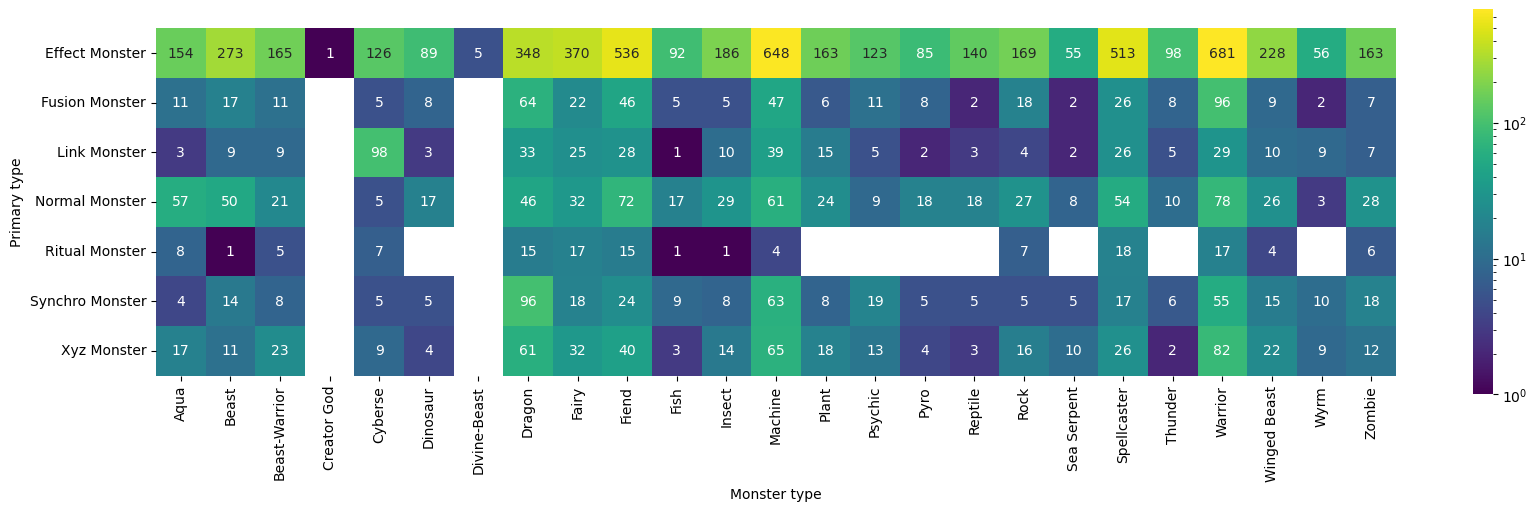

In [37]:
plt.figure(figsize = (20,5))
sns.heatmap(monster_crosstab_b[monster_crosstab_b>0].T, annot=True, fmt="g", cmap='viridis', square=True, norm = mc.LogNorm())
plt.show()

#### By secondary type

In [38]:
monster_crosstab_c = pd.crosstab(exploded_secondary_type['Monster type'],exploded_secondary_type['Secondary type'], dropna=False)
monster_crosstab_c

Secondary type  Flip monster  Gemini monster  Spirit monster  Toon monster  \
Monster type                                                                 
Aqua                       4               4               1             1   
Beast                     15               1               2             0   
Beast-Warrior              1               0               1             0   
Cyberse                    0               0               0             0   
Dinosaur                   0               0               0             0   
Dragon                     1               6               1             3   
Fairy                      8               2               8             0   
Fiend                     27               4               2             1   
Fish                       0               1               0             0   
Insect                    20               2               0             0   
Machine                   10               1               0             4   
Plant                      4               1               0             0   
Psychic                    3               0               0             0   
Pyro                       4               2               2             0   
Reptile                   18               1               0             0   
Rock                      11               1               2             0   
Sea Serpent                1               1               0             0   
Spellcaster               35               3               4             4   
Thunder                    3               1               1             0   
Warrior                   12               9               6             3   
Winged Beast               5               2               7             1   
Wyrm                       0               0               0             0   
Zombie                     4               3               2             0   

Secondary type  Tuner monster  Union monster  
Monster type                                  
Aqua                       11              3  
Beast                      22              0  
Beast-Warrior               9              0  
Cyberse                     7              0  
Dinosaur                    8              0  
Dragon                     44              4  
Fairy                      22              5  
Fiend                      41              1  
Fish                        8              0  
Insect                     12              0  
Machine                    87             18  
Plant                      20              1  
Psychic                    24              0  
Pyro                        8              1  
Reptile                     7              0  
Rock                        3              0  
Sea Serpent                 9              0  
Spellcaster                41              0  
Thunder                     8              0  
Warrior                    32              3  
Winged Beast               31              0  
Wyrm                       10              0  
Zombie                     23              1

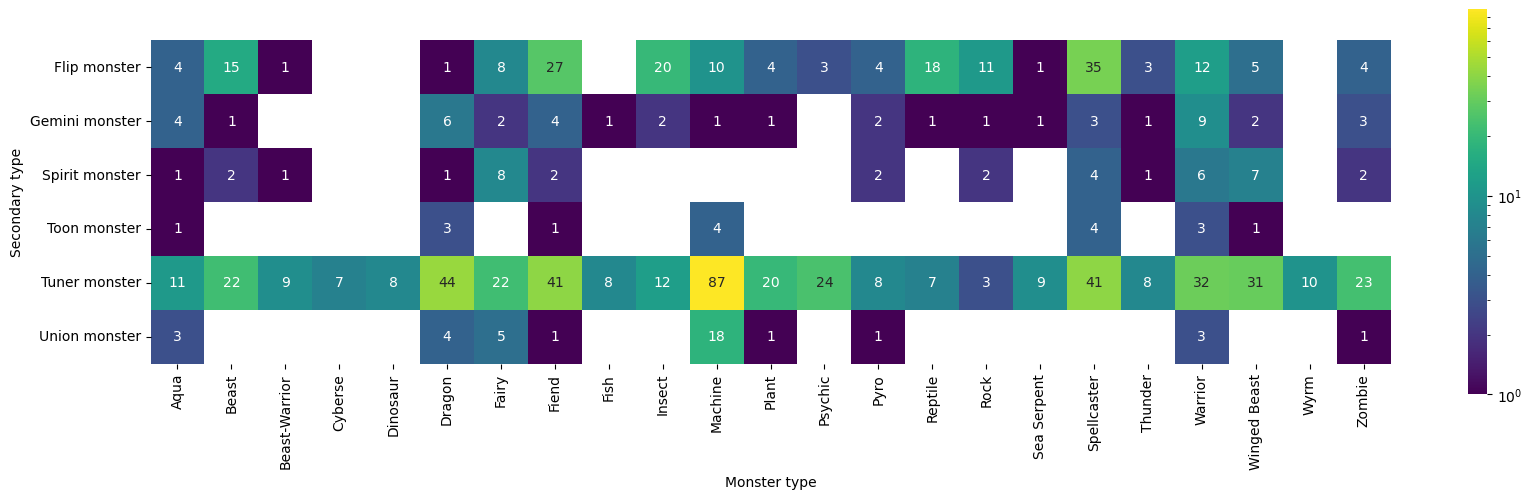

In [39]:
plt.figure(figsize = (20,5))
sns.heatmap(monster_crosstab_c[monster_crosstab_c>0].T, annot=True, fmt="g", cmap='viridis', square=True, norm = mc.LogNorm())
plt.show()

### Effect type

In [40]:
print('Total number of effect types:', monster_df['Effect type'].explode().nunique())

Total number of effect types: 14


In [41]:
monster_df[monster_df['Effect type'].notna()].drop(columns=['Card type']).explode('Effect type').groupby('Effect type').nunique()

Name  Password  Archseries  Attribute  Primary type  \
Effect type                                                                   
Activation condition       1         1           1          1             1   
Condition               3136      3084         651          7             7   
Continuous Effect       2169      2161         560          7             6   
Continuous-like Effect   236       236          72          6             6   
Flip effect              171       170          44          6             1   
Ignition Effect         2631      2617         644          7             6   
Ignition-like Effect     226       220          77          6             6   
Lingering effect          19        19          12          6             3   
Maintenance cost          44        44           8          6             3   
Quick Effect            1042      1033         398          6             6   
Quick-like Effect          4         4           1          1             1   
Summoning condition      933       887         319          7             6   
Trigger Effect          4361      4339         775          7             7   
Unclassified effect      822       815         277          7             6   

                        Secondary type  Monster type  Level/Rank  DEF  \
Effect type                                                             
Activation condition                 0             1           1    1   
Condition                            7            25          14   64   
Continuous Effect                    5            24          14   52   
Continuous-like Effect               4            21          11   36   
Flip effect                          2            19          12   33   
Ignition Effect                      7            24          13   61   
Ignition-like Effect                 3            20          12   33   
Lingering effect                     2            14           8   13   
Maintenance cost                     0            12           8   18   
Quick Effect                         5            23          13   49   
Quick-like Effect                    0             1           1    2   
Summoning condition                  4            25          13   52   
Trigger Effect                       7            24          14   63   
Unclassified effect                  5            25          13   45   

                        Pendulum Scale  Link  Link Arrows  ATK  TCG status  \
Effect type                                                                  
Activation condition                 1     0            0    1           1   
Condition                           13     6           54   63           5   
Continuous Effect                   12     6           48   59           5   
Continuous-like Effect              13     1            2   42           3   
Flip effect                          1     0            0   38           3   
Ignition Effect                     12     5           42   66           5   
Ignition-like Effect                13     1            1   35           3   
Lingering effect                     0     2            2   13           2   
Maintenance cost                     2     1            1   21           1   
Quick Effect                         9     6           29   50           4   
Quick-like Effect                    0     0            0    3           1   
Summoning condition                  9     5            7   52           5   
Trigger Effect                      13     6           51   66           5   
Unclassified effect                  9     5           12   49           4   

                        OCG status  Page URL  Artwork  Modification date  \
Effect type                                                                
Activation condition             1         1        0                  1   
Condition                        6      3136        3               3117   
Continuous Effect                5   

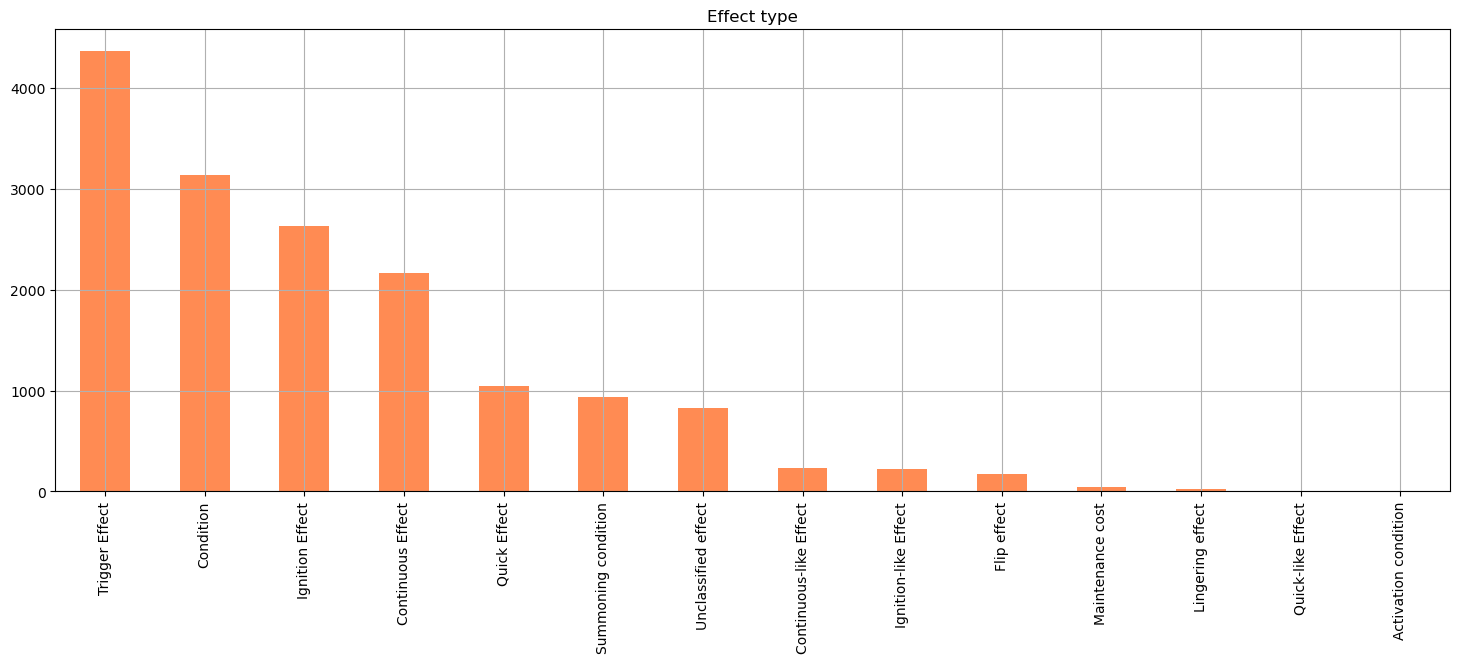

In [42]:
monster_effect_colors = colors_dict['Effect Monster']
monster_df['Effect type'].explode('Effect type').value_counts().plot.bar(figsize = (18,6), grid = True, color = monster_effect_colors, title='Effect type')
# plt.yscale('log')
plt.show()

### ATK

In [43]:
print('Total number of ATK values:', monster_df['ATK'].nunique())

Total number of ATK values: 82


In [44]:
monster_df.drop(columns=['Card type']).groupby('ATK').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

Name  Password  Archseries  Attribute  Primary type  Secondary type  \
ATK                                                                         
0      602       600         228          6             7               7   
50       2         2           2          2             1               0   
100    219       219         107          6             5               3   
150      1         1           0          1             1               0   
200    122       122          69          6             6               5   
...    ...       ...         ...        ...           ...             ...   
4500    12        12           9          3             3               0   
4600     2         2           1          2             1               0   
5000     9         9           6          3             5               0   
?       79        75          36          7             5               1   
X000     1         0           1          1             0               0   

      Monster type  Effect type  Level/Rank  DEF  Pendulum Scale  Link  \
ATK                                                                      
0               23           94          13   35               9     5   
50               2            2           1    2               0     0   
100             20           48          11   27               8     2   
150              1            0           1    1               0     0   
200             20           36           7   22               5     1   
...            ...          ...         ...  ...             ...   ...   
4500             6           10           4    4               0     0   
4600             1            2           1    1               0     0   
5000             4            8           2    4               0     1   
?               20           34          13    8               2     1   
X000             1            0           1    1               0     0   

      Link Arrows  TCG status  OCG status  Page URL  Artwork  \
ATK                                                            
0              15           6           5       602        3   
50              0           1           1         2        0   
100             2           3           2       219        2   
150             0           1           1         1        0   
200             2           2           3       122        1   
...           ...         ...         ...       ...      ...   
4500            0           1           1        12        1   
4600            0           1           1         2        1   
5000            1           1           1         9        1   
?               1           3           3        80        3   
X000            0           1           1         1        0   

      Modification date  Errata  
ATK                              
0                   601       3  
50                    2       0  
100                 219       3  
150                   1       0  
200                 122       3  
...                 ...     ...  
4500                 12       2  
4600                  2       0  
5000                  9       1  
?                    80       3  
X000                  1       0  

[82 rows x 19 columns]

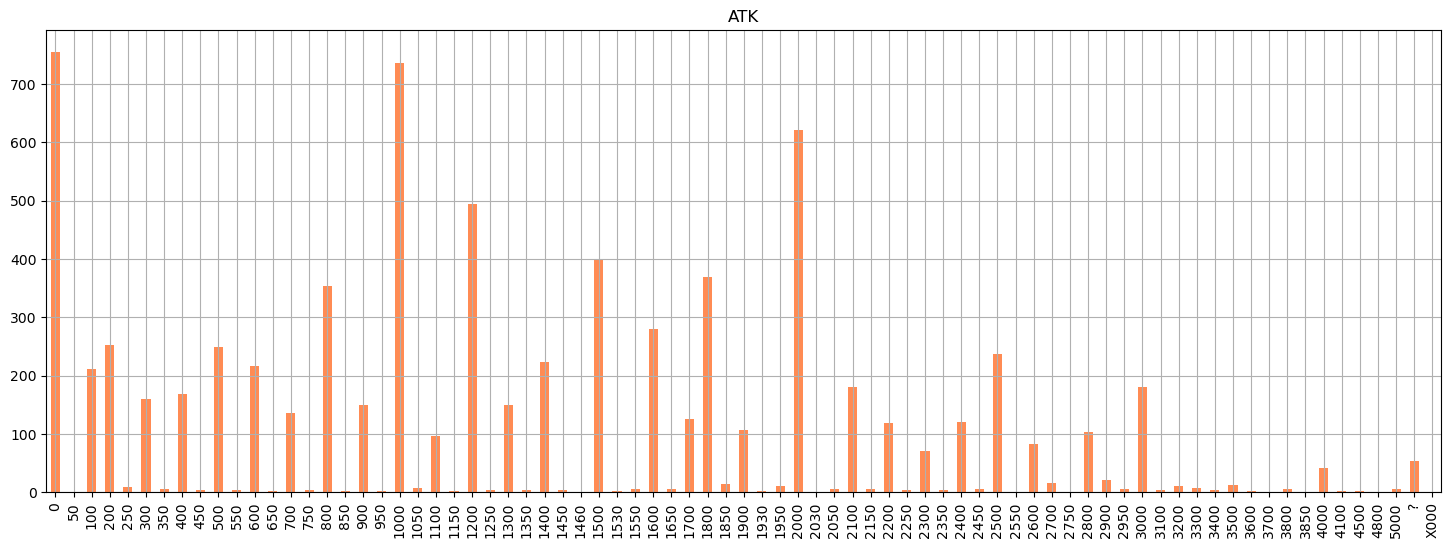

In [45]:
atk_colors = colors_dict['Monster Card']
monster_df['DEF'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, color = atk_colors, title = 'ATK')
plt.show()

### DEF

In [46]:
print('Total number of DEF values:', monster_df['DEF'].nunique())

Total number of DEF values: 77


In [47]:
monster_df.drop(columns=['Card type']).groupby('DEF').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

Name  Password  Archseries  Attribute  Primary type  Secondary type  \
DEF                                                                         
0      755       754         253          6             6               8   
50       1         1           1          1             1               0   
100    211       211          95          6             5               4   
200    252       251         109          6             5               5   
250      8         8           3          4             2               1   
...    ...       ...         ...        ...           ...             ...   
4500     2         2           1          2             2               0   
4800     1         1           1          1             1               0   
5000     5         5           3          3             2               0   
?       53        49          25          7             4               1   
X000     1         0           1          1             0               0   

      Monster type  Effect type  Level/Rank  Pendulum Scale  Link  \
DEF                                                                 
0               23          104          13              10     0   
50               1            1           1               0     0   
100             19           47          10               8     0   
200             23           48          10               5     0   
250              5            5           2               0     0   
...            ...          ...         ...             ...   ...   
4500             2            2           1               0     0   
4800             1            1           1               0     0   
5000             3            4           2               0     0   
?               17           25          13               1     0   
X000             1            0           1               0     0   

      Link Arrows  ATK  TCG status  OCG status  Page URL  Artwork  \
DEF                                                                 
0               0   45           4           4       755        2   
50              0    1           1           1         1        0   
100             0   24           2           3       211        2   
200             0   31           2           4       252        2   
250             0    4           1           1         8        0   
...           ...  ...         ...         ...       ...      ...   
4500            0    1           1           1         2        0   
4800            0    1           1           1         1        0   
5000            0    2           1           1         5        1   
?               0    2           3           3        54        2   
X000            0    1           1           1         1        0   

      Modification date  Errata  
DEF                              
0                   752       3  
50                    1       0  
100                 210       3  
200                 252       3  
250                   8       1  
...                 ...     ...  
4500                  2       0  
4800                  1       0  
5000                  5       1  
?                    54       3  
X000                  1       0  

[77 rows x 19 columns]

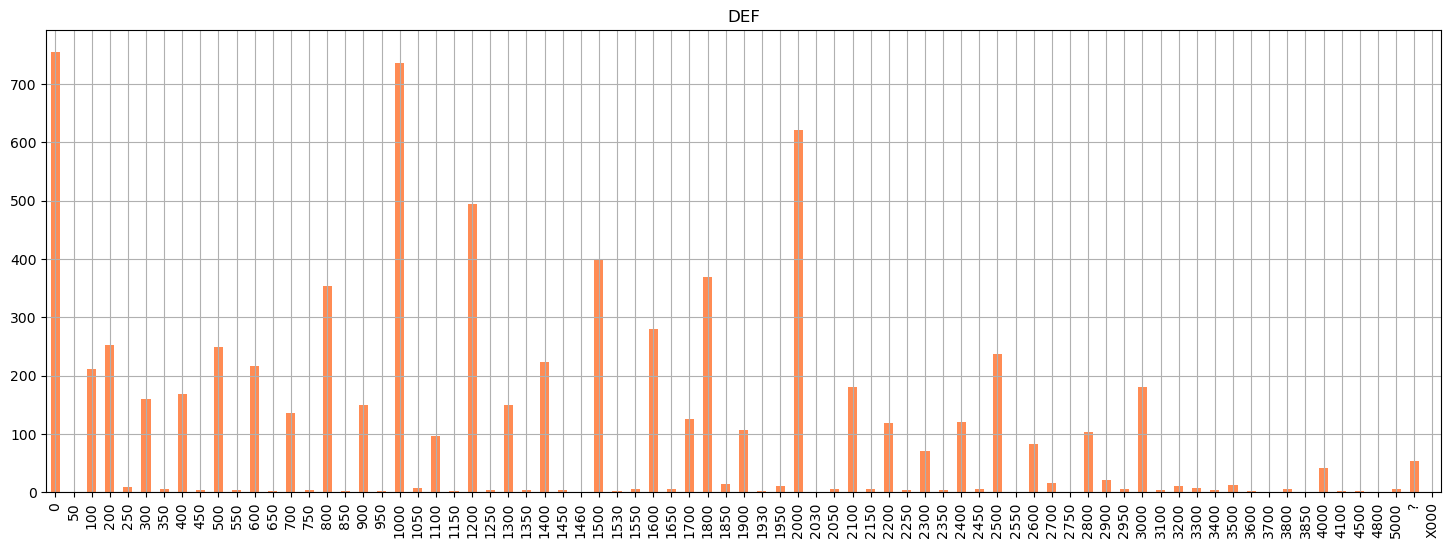

In [48]:
def_colors = colors_dict['Monster Card']
monster_df['DEF'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, color = def_colors, title = 'DEF')
plt.show()

### Level/Rank

In [49]:
monster_df.drop(columns=['Card type', 'Link', 'Link Arrows']).groupby('Level/Rank').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

Name  Password  Archseries  Attribute  Primary type  \
Level/Rank                                                        
0              6         6           3          2             2   
1            611       610         223          6             6   
2            676       674         213          6             6   
3           1150      1146         294          6             6   
4           2350      2349         514          6             6   
5            602       599         242          6             6   
6            614       608         237          6             6   
7            469       465         226          6             6   
8            683       668         301          6             6   
9            147       144          85          6             5   
10           252       241         150          7             5   
11            31        31          23          6             5   
12            59        53          41          7             5   
13             1         1           1          1             1   

            Secondary type  Monster type  Effect type  DEF  Pendulum Scale  \
Level/Rank                                                                   
0                        0             2            5    3               0   
1                        7            23           81   30              10   
2                        6            23           76   30               7   
3                        6            23           96   36               9   
4                        6            23          135   47               9   
5                        6            23           84   39               8   
6                        6            23           92   38               9   
7                        6            23          101   35               9   
8                        5            23          110   41               8   
9                        2            21           56   27               1   
10                       2            22           77   33               6   
11                       3            13           22   16               1   
12                       1            13           33   18               3   
13                       0             1            1    1               0   

            ATK  TCG status  OCG status  Page URL  Artwork  Modification date  \
Level/Rank                                                                      
0             3           2           2         6        0                  6   
1            22           4           4       611        2                609   
2            29           3           6       676        1                674   
3            41           3           6      1150        3               1150   
4            54           4           6      2350        3               2343   
5            46           3           4       602        2                602   
6            38           5           6       615        3                615   
7            38           5           4       471        2                471   
8            42           5           5       685        3                684   
9            31           4           3       147        1                147   
10           32           4           3       255        3                255   
11           15           2           1        31        1                 31   
12           13           1           3        59        1                 59   
13            1           1           1         1        0                  1   

            Errata  
Level/Rank          
0                0  
1                3  
2                3  
3                3  
4                3  
5                3  
6                3  
7                3  
8                3  
9                3  
10               3  
11               1  
12               2  
13               0

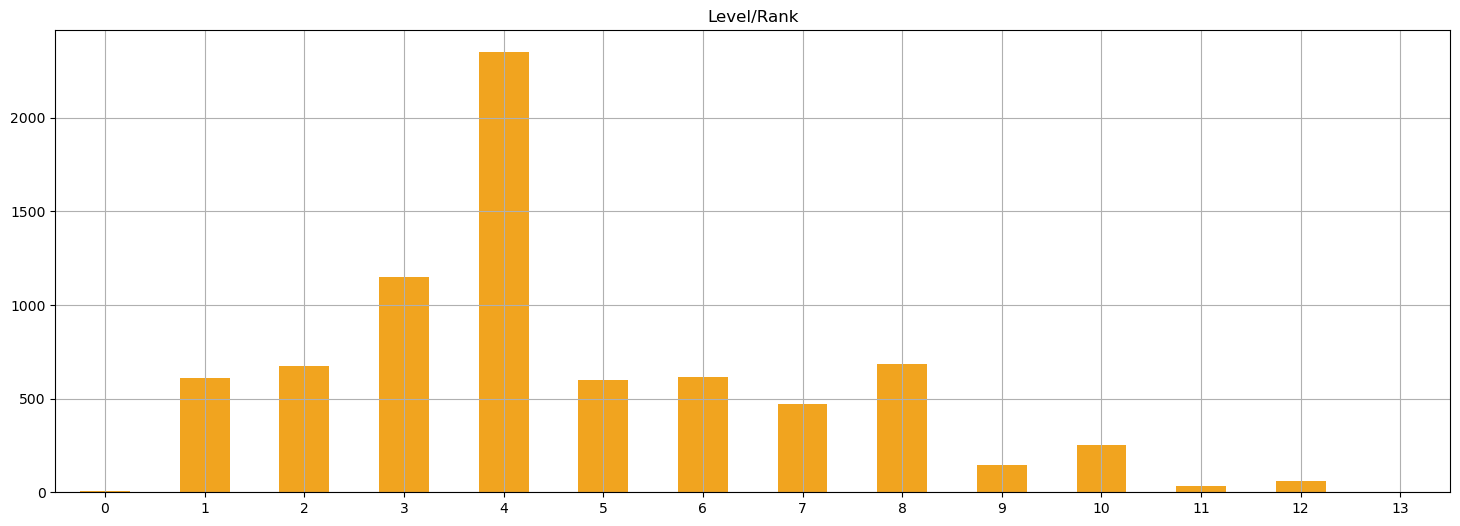

In [50]:
stars_colors = colors_dict['Level']
monster_df['Level/Rank'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, rot=0, color= stars_colors, title = 'Level/Rank')
plt.show()

#### ATK statistics

In [51]:
monster_df[['Level/Rank','ATK']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Level/Rank').describe()

ATK                                                         \
             count         mean          std  min     25%     50%     75%   
Level/Rank                                                                  
0              5.0   600.000000  1341.640786  0.0     0.0     0.0     0.0   
1            602.0   243.770764   353.151112  0.0     0.0   100.0   300.0   
2            674.0   582.121662   407.875782  0.0   300.0   500.0   800.0   
3           1147.0   957.672188   485.624483  0.0   600.0  1000.0  1300.0   
4           2338.0  1417.976903   541.688248  0.0  1200.0  1500.0  1800.0   
5            599.0  1760.550918   643.239500  0.0  1500.0  1900.0  2200.0   
6            611.0  2016.939444   611.451078  0.0  1900.0  2200.0  2400.0   
7            467.0  2285.546039   618.977309  0.0  2200.0  2500.0  2600.0   
8            675.0  2547.185185   704.489263  0.0  2500.0  2800.0  3000.0   
9            144.0  2605.208333   831.203499  0.0  2500.0  2800.0  3000.0   
10           232.0  2817.456897  1216.555708  0.0  2800.0  3000.0  3500.0   
11            31.0  2990.322581  1074.741779  0.0  3000.0  3300.0  3500.0   
12            55.0  3281.818182  1391.786876  0.0  3000.0  3800.0  4000.0   

                    
               max  
Level/Rank          
0           3000.0  
1           2500.0  
2           2400.0  
3           3000.0  
4           3000.0  
5           4000.0  
6           4000.0  
7           3300.0  
8           4500.0  
9           4500.0  
10          5000.0  
11          4000.0  
12          5000.0

#### DEF statistics

In [52]:
monster_df[['Level/Rank','DEF']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Level/Rank').describe()

DEF                                                         \
             count         mean          std  min     25%     50%     75%   
Level/Rank                                                                  
0              5.0   400.000000   894.427191  0.0     0.0     0.0     0.0   
1            604.0   350.331126   528.405301  0.0     0.0   100.0   400.0   
2            675.0   668.666667   558.731342  0.0   200.0   500.0   900.0   
3           1147.0   956.974717   573.242973  0.0   600.0   900.0  1300.0   
4           2340.0  1169.243590   608.859123  0.0   800.0  1200.0  1600.0   
5            600.0  1425.750000   674.116577  0.0  1000.0  1500.0  1900.0   
6            611.0  1553.486088   711.561979  0.0  1200.0  1700.0  2000.0   
7            469.0  1890.191898   652.378755  0.0  1600.0  2000.0  2300.0   
8            682.0  1985.043988   846.151735  0.0  1600.0  2100.0  2500.0   
9            144.0  2312.152778   787.805808  0.0  2000.0  2500.0  2900.0   
10           241.0  2232.572614  1274.618905  0.0  1900.0  2500.0  3000.0   
11            31.0  2672.580645  1151.364315  0.0  2250.0  3000.0  3400.0   
12            56.0  2805.357143  1614.301948  0.0  2000.0  3000.0  4000.0   

                    
               max  
Level/Rank          
0           2000.0  
1           2500.0  
2           2400.0  
3           3000.0  
4           3000.0  
5           3000.0  
6           3000.0  
7           3300.0  
8           4000.0  
9           3700.0  
10          5000.0  
11          4000.0  
12          5000.0

### Pendulum scale

In [53]:
monster_df.drop(columns=['Card type', 'Link', 'Link Arrows']).groupby('Pendulum Scale').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

Name  Password  Archseries  Attribute  Primary type  \
Pendulum Scale                                                        
0                 11        11           8          5             2   
1                 70        67          39          6             5   
2                 36        36          15          6             2   
3                 37        37          17          6             3   
4                 33        33          17          5             5   
5                 34        34          16          6             2   
6                 15        15           9          4             1   
7                 27        27          16          6             2   
8                 43        43          23          6             5   
9                  8         8           3          3             2   
10                15        12           8          6             5   
12                 3         3           3          2             2   
13                 1         1           1          1             1   

                Secondary type  Monster type  Effect type  Level/Rank  DEF  \
Pendulum Scale                                                               
0                            1             8            9           6    6   
1                            2            10           38          11   27   
2                            1            11           21           6   22   
3                            1            16           24           8   15   
4                            0             8           25           8   16   
5                            1            12           20           7   21   
6                            1             7           11           6   11   
7                            1            14           14           6   17   
8                            1             9           24           8   18   
9                            1             3            5           5    2   
10                           0             6           11           6    8   
12                           0             3            3           2    3   
13                           0             1            1           1    1   

                ATK  TCG status  OCG status  Page URL  Artwork  \
Pendulum Scale                                                   
0                 6           1           1        11        1   
1                28           3           4        70        1   
2                17           2           2        36        1   
3                23           1           1        37        0   
4                18           1           1        33        2   
5                23           3           3        34        0   
6                11           1           1        15        0   
7                19           1           1        27        1   
8                19           1           2        43        0   
9                 3           1           1         8        0   
10                6           2           2        15        0   
12                3           1           1         3        0   
13                1           1           1         1        0   

                Modification date  Errata  
Pendulum Scale                             
0                              11       0  
1                              70       1  
2                              36       2  
3                              37       0  
4                              33       1  
5                              34       1  
6                              15       0  
7                              27       1  
8                              43       1  
9                               8       0  
10                             15       0  
12                              3       0  
13                              1       0

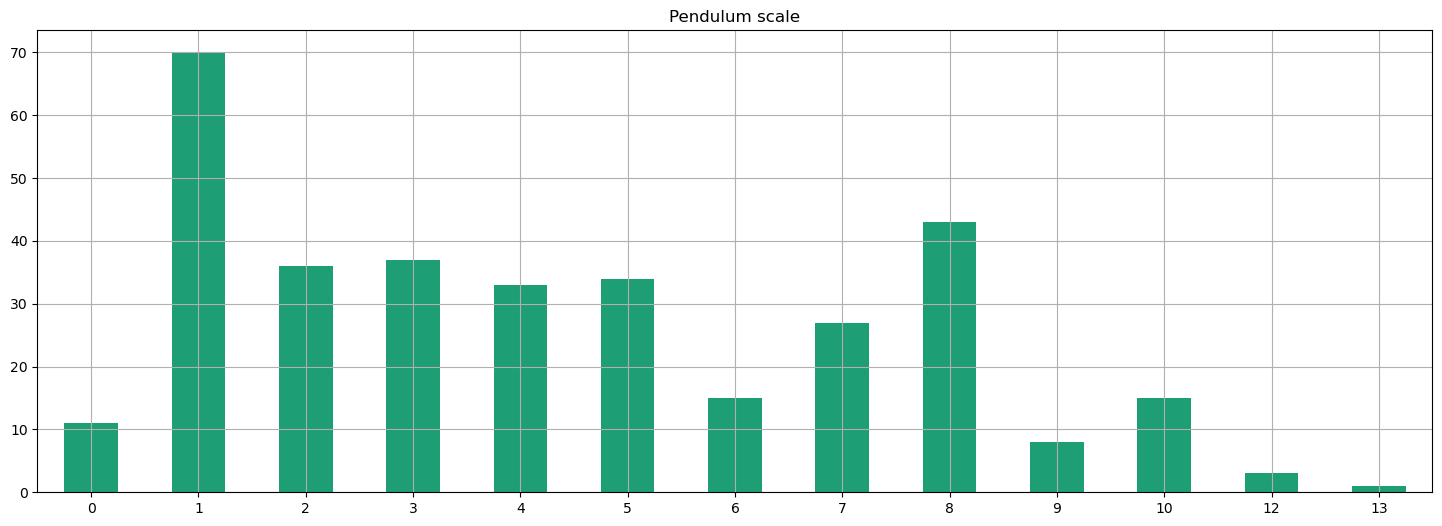

In [54]:
scales_colors = colors_dict['Pendulum Monster']
monster_df['Pendulum Scale'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, rot=0, color = scales_colors, title = 'Pendulum scale')
plt.show()

#### ATK statistics

In [55]:
monster_df[['Pendulum Scale','ATK']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Pendulum Scale').describe()

ATK                                                    \
               count         mean          std     min     25%     50%   
Pendulum Scale                                                           
0               11.0  1281.818182  1300.629218     0.0     0.0  1100.0   
1               69.0  1740.579710  1034.737654     0.0  1000.0  1800.0   
2               36.0  1423.611111   688.734462   100.0   800.0  1500.0   
3               37.0  1463.513514   848.417534     0.0   600.0  1750.0   
4               33.0  1824.242424  1017.972956     0.0  1200.0  2000.0   
5               34.0  1339.705882   808.831875     0.0   850.0  1325.0   
6               15.0  1320.000000   707.308783   100.0   950.0  1500.0   
7               27.0  1279.629630   787.920737     0.0   700.0  1400.0   
8               43.0  1211.627907   946.222893     0.0   300.0  1200.0   
9                8.0  2150.000000   730.948503  1000.0  2050.0  2400.0   
10              15.0  1766.666667  1369.914839     0.0   250.0  2500.0   
12               2.0  1550.000000  2050.609665   100.0   825.0  1550.0   
13               1.0     0.000000          NaN     0.0     0.0     0.0   

                                
                   75%     max  
Pendulum Scale                  
0               2500.0  3000.0  
1               2500.0  4000.0  
2               2000.0  2500.0  
3               2100.0  2600.0  
4               2700.0  3000.0  
5               1800.0  3450.0  
6               1800.0  2400.0  
7               1750.0  3000.0  
8               1900.0  3300.0  
9               2500.0  2800.0  
10              2950.0  3000.0  
12              2275.0  3000.0  
13                 0.0     0.0

#### DEF statistics

In [56]:
monster_df[['Pendulum Scale','DEF']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Pendulum Scale').describe()

DEF                                                    \
               count         mean          std     min     25%     50%   
Pendulum Scale                                                           
0               11.0  1154.545455  1217.672892     0.0     0.0   700.0   
1               70.0  1632.857143   968.447350     0.0  1000.0  1800.0   
2               36.0  1338.888889   728.316171     0.0   875.0  1200.0   
3               37.0  1144.594595   787.910720     0.0   500.0  1200.0   
4               33.0  1563.636364   834.347867     0.0  1000.0  1600.0   
5               34.0  1136.764706   822.625953     0.0   550.0  1000.0   
6               15.0  1226.666667   711.604492   400.0   600.0  1100.0   
7               27.0  1312.962963   830.383669     0.0   700.0  1300.0   
8               43.0  1048.837209   761.693631     0.0   400.0  1000.0   
9                8.0  1225.000000   636.396103  1000.0  1000.0  1000.0   
10              15.0  1926.666667  1123.430122     0.0  1000.0  2500.0   
12               2.0  1550.000000  2050.609665   100.0   825.0  1550.0   
13               1.0     0.000000          NaN     0.0     0.0     0.0   

                                
                   75%     max  
Pendulum Scale                  
0               2500.0  3000.0  
1               2400.0  4000.0  
2               1825.0  2700.0  
3               1800.0  3000.0  
4               2300.0  2800.0  
5               1575.0  3000.0  
6               1700.0  2600.0  
7               2000.0  2700.0  
8               1600.0  2700.0  
9               1000.0  2800.0  
10              2700.0  3000.0  
12              2275.0  3000.0  
13                 0.0     0.0

#### Level/Rank statistics

In [57]:
monster_df[['Pendulum Scale','Level/Rank']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Pendulum Scale').describe()

Level/Rank                                                  
                    count      mean       std  min   25%   50%    75%   max
Pendulum Scale                                                             
0                    11.0  5.636364  3.529100  1.0  2.00   7.0   8.00  10.0
1                    70.0  6.042857  2.410338  1.0  4.00   6.0   8.00  12.0
2                    36.0  4.416667  1.380993  1.0  3.75   4.0   5.00   7.0
3                    37.0  4.432432  1.708484  1.0  4.00   4.0   5.00  10.0
4                    33.0  5.606061  2.135114  1.0  4.00   6.0   7.00   8.0
5                    34.0  4.176471  1.961301  1.0  3.00   4.0   4.00  11.0
6                    15.0  3.933333  1.579632  1.0  3.00   4.0   4.50   8.0
7                    27.0  4.185185  1.641693  2.0  3.00   4.0   5.00  10.0
8                    43.0  3.860465  2.284330  1.0  2.00   4.0   5.00  10.0
9                     8.0  5.625000  1.302470  4.0  5.00   5.0   6.25   8.0
10                   15.0  7.066667  3.034720  1.0  7.00   7.0   9.00  12.0
12                    3.0  8.333333  6.350853  1.0  6.50  12.0  12.00  12.0
13                    1.0  7.000000       NaN  7.0  7.00   7.0   7.00   7.0

### Link

In [58]:
monster_df.drop(columns=['Card type', 'Primary type', 'Secondary type','Level/Rank','DEF','Pendulum Scale']).groupby('Link').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

Name  Password  Archseries  Attribute  Monster type  Effect type  \
Link                                                                     
1       49        48          27          6            11           17   
2      187       187         103          6            23           32   
3       84        84          48          6            16           25   
4       44        41          24          6            16           21   
5        9         6           5          2             5            6   
6        2         2           2          1             1            2   

      Link Arrows  ATK  TCG status  OCG status  Page URL  Artwork  \
Link                                                                
1               8   10           3           5        49        1   
2              19   24           2           4       187        3   
3              17   18           3           2        84        2   
4              13   12           3           4        44        3   
5               3    4           3           2         9        0   
6               2    2           1           1         2        0   

      Modification date  Errata  
Link                             
1                    49       0  
2                   185       2  
3                    84       1  
4                    44       0  
5                     9       0  
6                     2       0

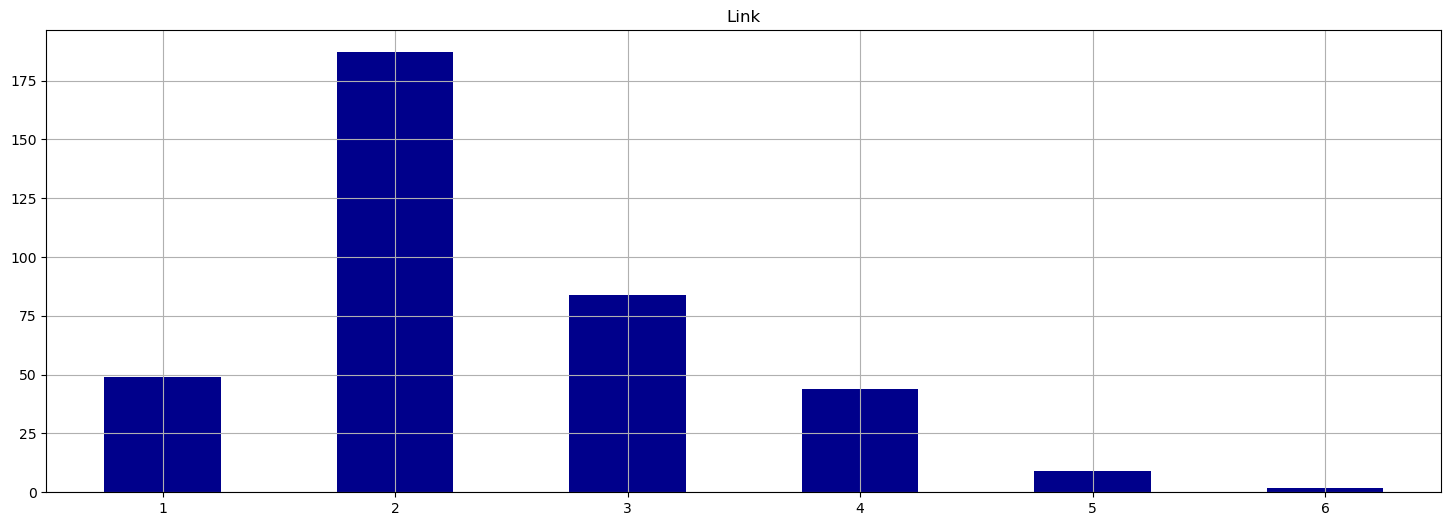

In [59]:
link_colors = colors_dict['Link Monster']
monster_df['Link'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, rot=0, color = link_colors, title='Link')
plt.show()

#### ATK statistics

In [60]:
monster_df[['Link','ATK']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Link').describe()

ATK                                                                  
      count         mean          std     min     25%     50%     75%     max
Link                                                                         
1      49.0   728.571429   476.969601     0.0   300.0   800.0  1000.0  1500.0
2     187.0  1410.427807   511.676381     0.0  1100.0  1500.0  1800.0  2300.0
3      84.0  2258.928571   651.234264     0.0  2200.0  2400.0  2500.0  4000.0
4      43.0  2660.465116   653.976676     0.0  2500.0  2800.0  3000.0  3300.0
5       9.0  3277.777778   712.000312  2500.0  3000.0  3000.0  3500.0  5000.0
6       2.0  1750.000000  2474.873734     0.0   875.0  1750.0  2625.0  3500.0

### Link Arrows

#### By combination

In [61]:
print('Total number of link arrow combinations:', monster_df['Link Arrows'].nunique())

Total number of link arrow combinations: 62


In [62]:
monster_df.drop(columns=['Card type', 'Primary type', 'Level/Rank', 'Pendulum Scale', 'Link', 'Secondary type', 'DEF']).groupby('Link Arrows').nunique()

Name  Password  Archseries  Attribute  Monster type  \
Link Arrows                                                         
(←,)             5         5           4          2             3   
(←, ↑)           4         4           2          2             3   
(←, →)          18        18           9          6             8   
(←, →, ↑)        8         8           5          4             5   
(↑,)            10        10           5          5             5   
...            ...       ...         ...        ...           ...   
(↙, ↘, ←, ↖)     1         1           1          1             1   
(↙, ↘, ↑)       22        22          15          6            11   
(↙, ↘, →)        2         2           2          2             2   
(↙, ↘, ↖)        2         2           0          2             2   
(↙, ↘, ↖, ↗)     1         1           1          1             1   

              Effect type  ATK  TCG status  OCG status  Page URL  Artwork  \
Link Arrows                                                                 
(←,)                    4    2           3           2         5        0   
(←, ↑)                  3    4           1           1         4        0   
(←, →)                  8   11           2           2        18        1   
(←, →, ↑)               7    6           1           1         8        0   
(↑,)                    9    6           1           1        10        0   
...                   ...  ...         ...         ...       ...      ...   
(↙, ↘, ←, ↖)            1    1           1           1         1        0   
(↙, ↘, ↑)              11   11           2           2        22        2   
(↙, ↘, →)               2    2           1           1         2        0   
(↙, ↘, ↖)               2    2           1           1         2        0   
(↙, ↘, ↖, ↗)            1    1           1           1         1        0   

              Modification date  Errata  
Link Arrows                              
(←,)                          5       0  
(←, ↑)                        4       0  
(←, →)                       18       0  
(←, →, ↑)                     8       0  
(↑,)                         10       0  
...                         ...     ...  
(↙, ↘, ←, ↖)                  1       0  
(↙, ↘, ↑)                    22       1  
(↙, ↘, →)                     2       0  
(↙, ↘, ↖)                     2       0  
(↙, ↘, ↖, ↗)                  1       0  

[62 rows x 13 columns]

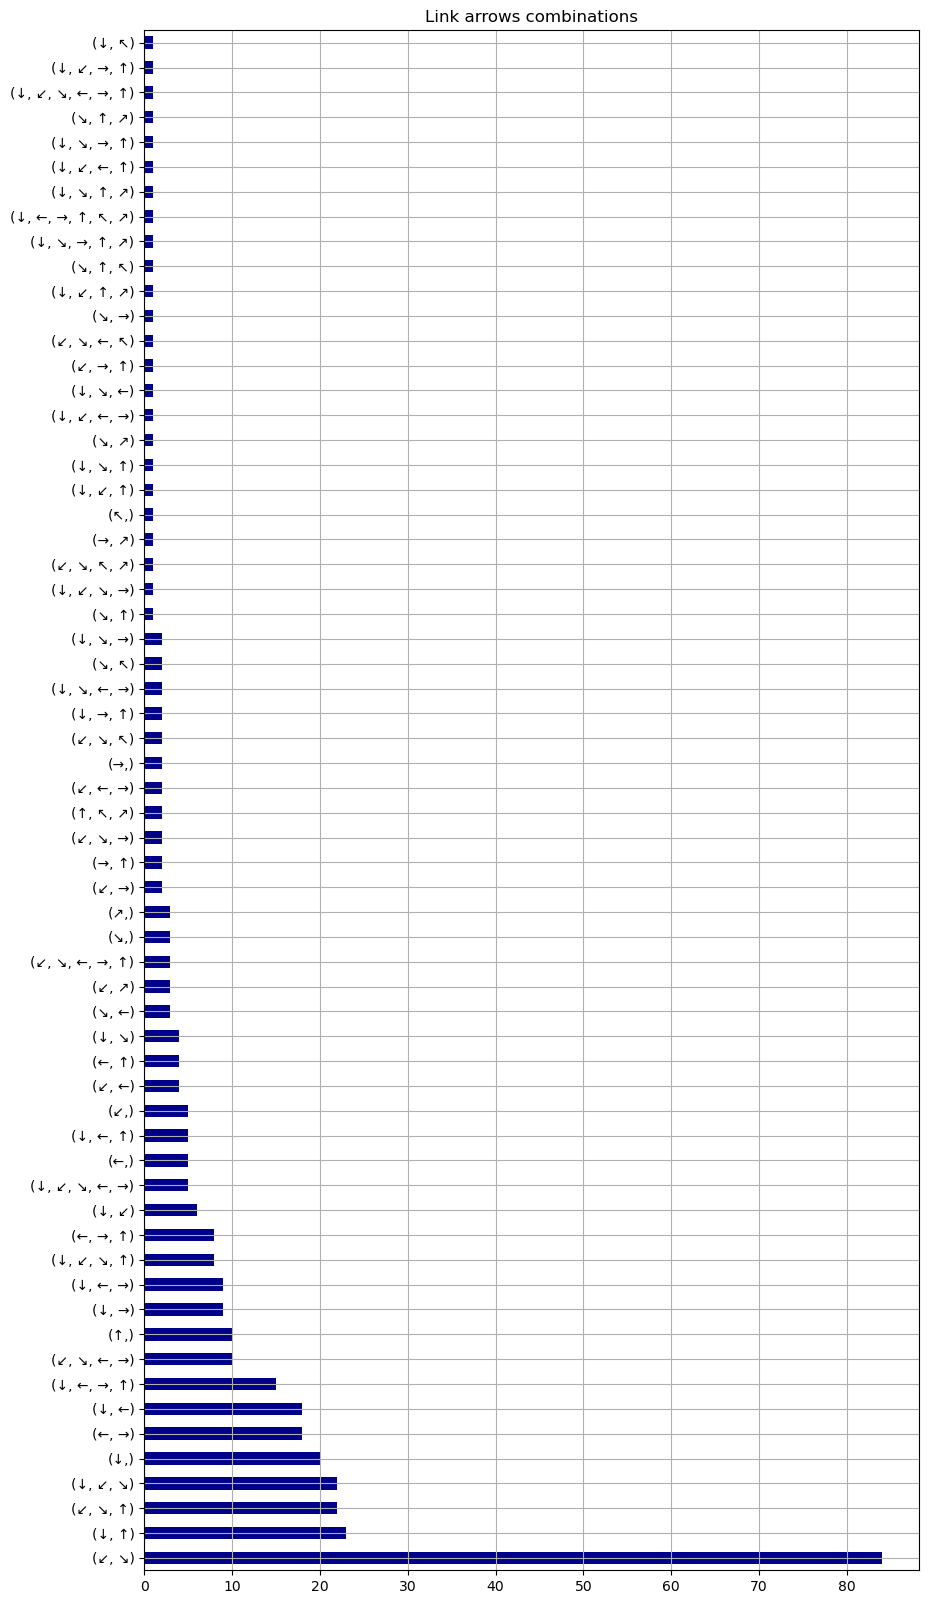

In [63]:
arrows_colors = colors_dict['Link Monster']
monster_df['Link Arrows'].value_counts().plot.barh(figsize = (10,20), grid = True, color = arrows_colors, title = 'Link arrows combinations')
plt.show()

#### By unique

In [64]:
monster_df[monster_df['Link Arrows'].notna()].drop(columns=['Card type', 'Primary type', 'Level/Rank', 'Pendulum Scale', 'Secondary type', 'DEF']).explode('Link Arrows').groupby('Link Arrows').nunique()

Name  Password  Archseries  Attribute  Monster type  Effect type  \
Link Arrows                                                                     
←             117       111          46          6            21           35   
↑             118       115          45          6            20           31   
→             103        97          40          6            19           30   
↓             164       157          71          6            20           41   
↖              12        12           6          5             5            7   
↗              16        16           8          5             7            7   
↘             188       185         103          6            22           36   
↙             190       187         104          6            22           37   

             Link  ATK  TCG status  OCG status  Page URL  Artwork  \
Link Arrows                                                         
←               6   29           5           3       117        3   
↑               6   27           4           4       118        3   
→               6   27           4           3       103        2   
↓               6   32           4           5       164        3   
↖               5   10           1           2        12        2   
↗               6   11           1           2        16        2   
↘               6   33           4           4       188        3   
↙               6   34           4           5       190        3   

             Modification date  Errata  
Link Arrows                             
←                          117       0  
↑                          118       1  
→                          103       0  
↓                          163       0  
↖                           12       0  
↗                           16       0  
↘                          188       2  
↙                          190       2

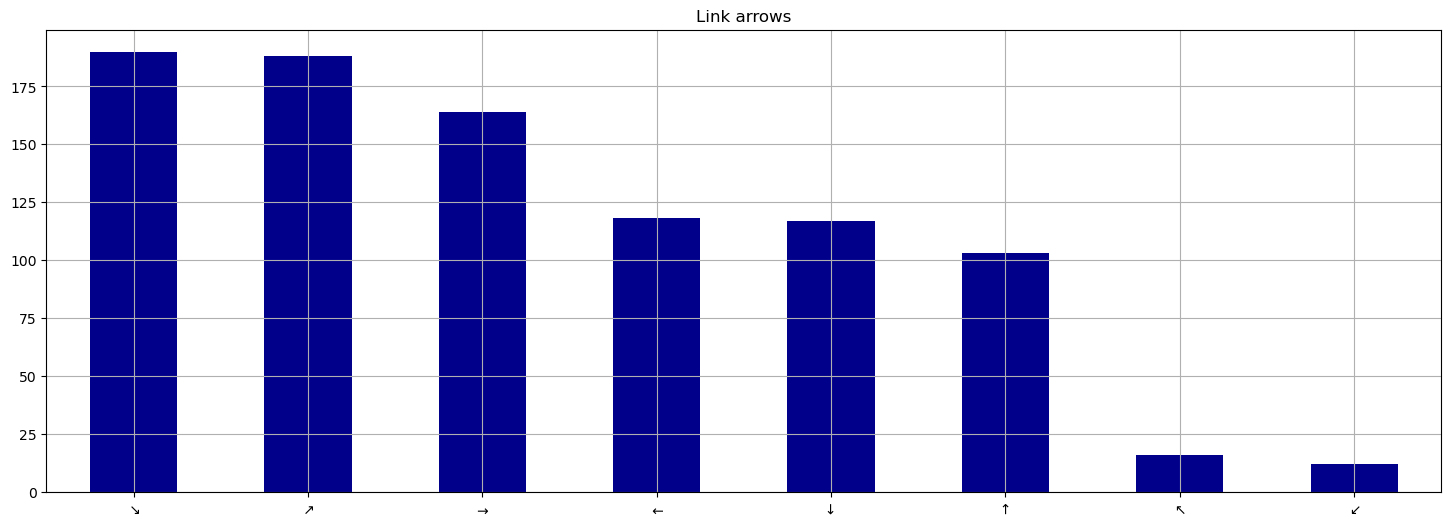

In [65]:
arrows_colors_b = colors_dict['Link Monster']
monster_df['Link Arrows'].explode('Link Arrows').value_counts().plot.bar(figsize = (18,6), grid = True, color = arrows_colors_b, title = 'Link arrows')
plt.show()

#### By link

In [66]:
arrow_per_link = monster_df[['Link Arrows','Link']].explode('Link Arrows').dropna()
arrow_crosstab = pd.crosstab(arrow_per_link['Link Arrows'],arrow_per_link['Link'])
arrow_crosstab

Link          1   2   3   4  5  6
Link Arrows                      
←             5  47  25  30  8  2
↑            10  30  44  28  4  2
→             2  33  26  31  9  2
↓            20  61  43  32  6  2
↖             1   3   5   2  0  1
↗             3   5   3   3  1  1
↘             3  96  54  25  9  1
↙             5  99  52  25  8  1

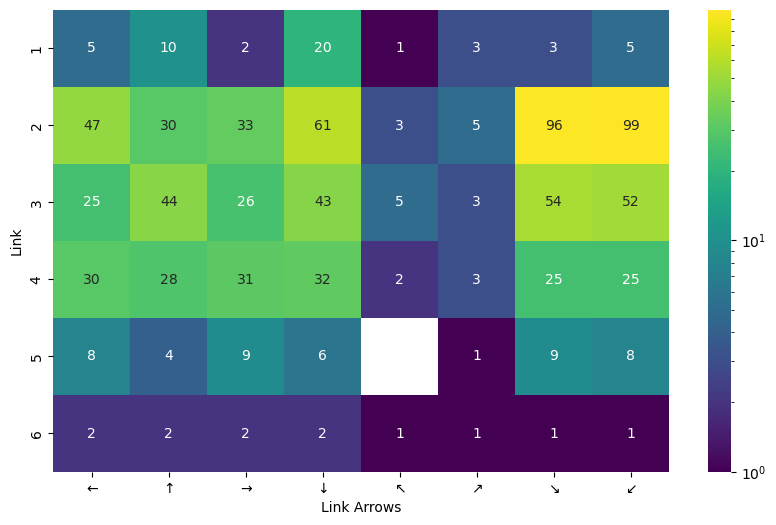

In [67]:
plt.figure(figsize = (10,6))
sns.heatmap(arrow_crosstab[arrow_crosstab>0].T, annot=True, fmt="g", cmap='viridis', square=True, norm=mc.LogNorm())
plt.show()

## Spell & Trap

### Properties

In [68]:
print('Total number of properties:', st_df['Property'].nunique())

Total number of properties: 9


In [69]:
st_df.drop(columns=['Card type']).groupby('Property').nunique()

Name  Password  Archseries  Effect type  TCG status  \
Property                                                                     
Continuous Spell Card   423       421         162           55           6   
Continuous Trap Card    495       486         163           64           3   
Counter Trap Card       158       155          60           19           2   
Equip Spell Card        264       264          75           37           3   
Field Spell Card        278       273         145           35           5   
Normal Spell Card       926       922         232           43           5   
Normal Trap Card       1174      1171         241           48           6   
Quick-Play Spell Card   434       431         140           35           3   
Ritual Spell Card        77        75          26            8           1   

                       OCG status  Page URL  Artwork  Modification date  \
Property                                                                  
Continuous Spell Card           4       423        2                419   
Continuous Trap Card            3       495        1                494   
Counter Trap Card               3       158        1                158   
Equip Spell Card                2       264        1                264   
Field Spell Card                5       279        1                279   
Normal Spell Card               6       927        3                925   
Normal Trap Card                5      1174        2               1170   
Quick-Play Spell Card           3       434        1                433   
Ritual Spell Card               2        77        1                 77   

                       Errata  
Property                       
Continuous Spell Card       3  
Continuous Trap Card        3  
Counter Trap Card           2  
Equip Spell Card            3  
Field Spell Card            3  
Normal Spell Card           3  
Normal Trap Card            2  
Quick-Play Spell Card       3  
Ritual Spell Card           2

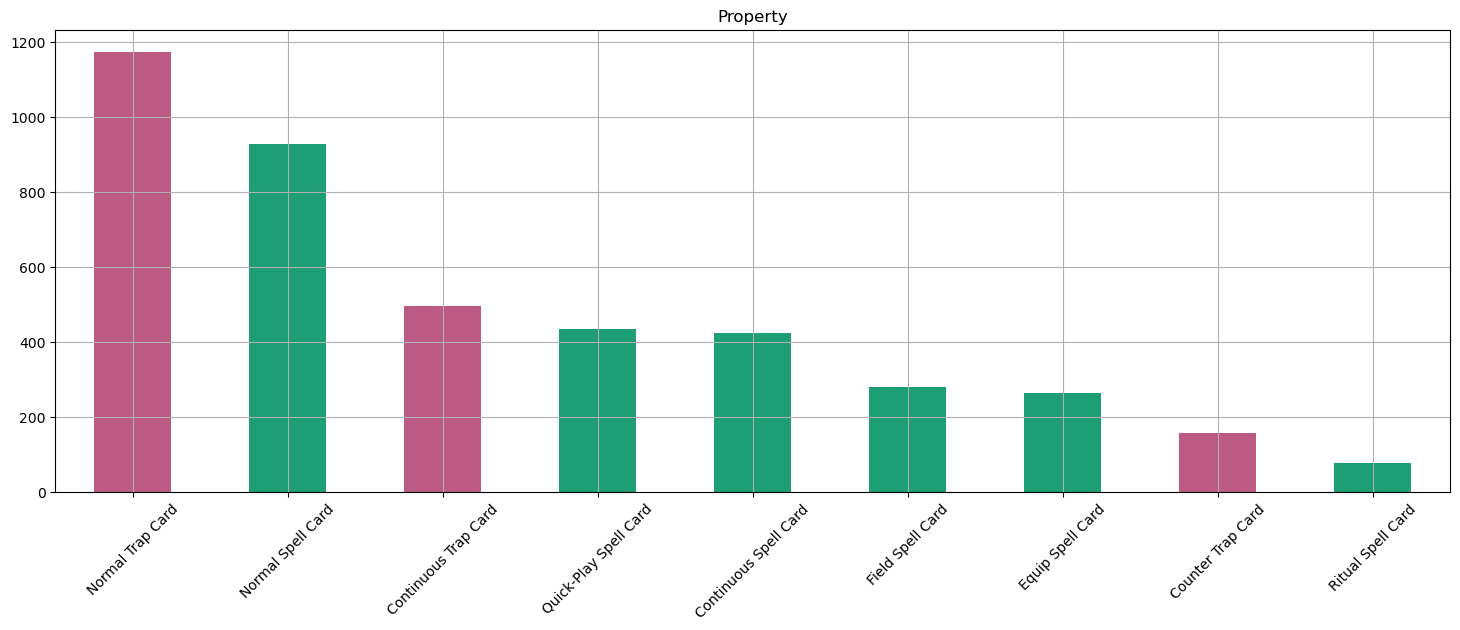

In [70]:
st_colors = [colors_dict[i] for i in cards_df[['Card type','Property']].value_counts().index.get_level_values(0)]
st_df['Property'].value_counts().plot.bar(figsize = (18,6), grid = True, rot=45, color = st_colors, title = 'Property')
plt.show()

### Effect type

In [71]:
print('Total number of effect types:', st_df['Effect type'].explode().nunique())

Total number of effect types: 14


In [72]:
st_df.explode('Effect type').groupby('Effect type').nunique()

Name  Password  Card type  Property  Archseries  \
Effect type                                                               
Activation condition     834       827          2         8         170   
Condition               1706      1687          2         9         379   
Continuous Effect         21        21          2         6          12   
Continuous-like Effect   905       897          2         7         238   
Cost                     451       449          2         7         112   
Effect                  2967      2944          2         9         435   
Ignition Effect            2         2          2         2           2   
Ignition-like Effect     450       445          1         6         186   
Lingering effect          96        96          2         6          43   
Maintenance cost          22        22          2         5           7   
Quick Effect               9         9          2         3           4   
Quick-like Effect        345       340          2         4         150   
Trigger Effect           854       846          2         9         262   
Unclassified effect       86        86          2         9          50   

                        TCG status  OCG status  Page URL  Artwork  \
Effect type                                                         
Activation condition             5           5       834        2   
Condition                        6           5      1707        2   
Continuous Effect                1           1        21        1   
Continuous-like Effect           6           5       906        2   
Cost                             5           4       451        2   
Effect                           6           6      2968        3   
Ignition Effect                  1           1         2        0   
Ignition-like Effect             4           5       450        2   
Lingering effect                 4           3        96        1   
Maintenance cost                 2           2        22        1   
Quick Effect                     1           1         9        0   
Quick-like Effect                4           4       345        1   
Trigger Effect                   4           5       854        1   
Unclassified effect              1           2        86        1   

                        Modification date  Errata  
Effect type                                        
Activation condition                  833       3  
Condition                            1692       3  
Continuous Effect                      21       2  
Continuous-like Effect                904       3  
Cost                                  451       3  
Effect                               2955       3  
Ignition Effect                         2       0  
Ignition-like Effect                  447       2  
Lingering effect                       96       2  
Maintenance cost                       22       1  
Quick Effect                            9       1  
Quick-like Effect                     345       1  
Trigger Effect                        848       3  
Unclassified effect                    86       1

#### Spell & Trap discrimination

In [73]:
spell = spell_df['Effect type'].explode('Effect type').value_counts().rename('Spell Card')
trap = trap_df['Effect type'].explode('Effect type').value_counts().rename('Trap Card')
st_diff = pd.concat([spell, trap], axis = 1).fillna(0).astype(int)
st_diff

Spell Card  Trap Card
Effect                        1550       1418
Condition                     1156        551
Continuous-like Effect         621        285
Trigger Effect                 576        278
Ignition-like Effect           450          0
Activation condition           244        590
Cost                           240        211
Unclassified effect             64         22
Lingering effect                56         40
Maintenance cost                11         11
Continuous Effect                7         14
Quick Effect                     4          5
Quick-like Effect                3        342
Ignition Effect                  1          1

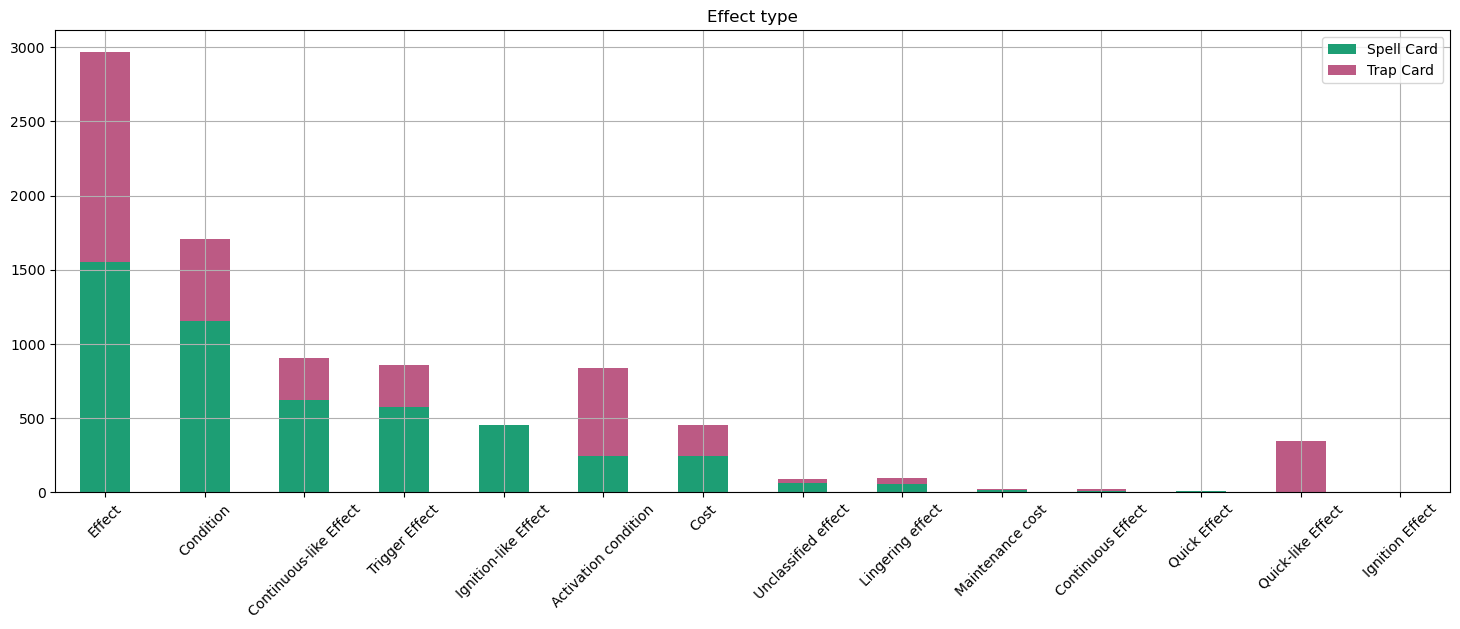

In [74]:
st_diff_colors = {'Spell Card': colors_dict['Spell Card'], 'Trap Card': colors_dict['Trap Card']}
st_diff.plot.bar(figsize = (18,6), stacked = True, grid = True, rot=45, color = st_diff_colors, title = 'Effect type')
plt.show()

## Archseries

In [75]:
exploded_archseries = cards_df.explode('Archseries')
print('Total number of Archseries:', exploded_archseries['Archseries'].nunique())

Total number of Archseries: 719


In [76]:
exploded_archseries.groupby('Archseries').nunique()

Name  Password  Card type  Property  Effect type  \
Archseries                                                            
"C"                   9         9          1         0            7   
-Eyes Dragon         73        73          1         0           44   
/Assault Mode         7         7          1         0            5   
@Ignister            18        18          1         0            9   
A-to-Z               16        16          1         0            5   
...                 ...       ...        ...       ...          ...   
sphinx               10        10          2         1            9   
sprout                2         2          1         0            2   
tellarknight         25        25          2         4           12   
with Chain            4         4          1         1            4   
with Eyes of Blue     8         8          2         2            6   

                   TCG status  OCG status  Page URL  Artwork  \
Archseries                                                     
"C"                         2           1         9        0   
-Eyes Dragon                2           2        73        1   
/Assault Mode               1           1         7        0   
@Ignister                   1           1        18        0   
A-to-Z                      1           1        16        2   
...                       ...         ...       ...      ...   
sphinx                      1           1        10        0   
sprout                      1           1         2        0   
tellarknight                1           2        25        0   
with Chain                  1           1         4        1   
with Eyes of Blue           1           1         8        0   

                   Modification date  Errata  Attribute  Primary type  \
Archseries                                                              
"C"                                9       1          1             2   
-Eyes Dragon                      73       3          6             7   
/Assault Mode                      7       0          5             1   
@Ignister                         18       0          6             6   
A-to-Z                            16       3          1             3   
...                              ...     ...        ...           ...   
sphinx                            10       0          2             1   
sprout                             2       0          1             1   
tellarknight                      25       0          2             2   
with Chain                         4       0          0             0   
with Eyes of Blue                  8       1          1             1   

                   Secondary type  Monster type  Level/Rank  DEF  \
Archseries                                                         
"C"                             0             1           8    8   
-Eyes Dragon                    2             3          10   13   
/Assault Mode                   0             6           5    6   
@Ignister                       1             1           7    9   
A-to-Z                          1             1           4   12   
...                           ...           ...         ...  ...   
sphinx                          0             2           4    5   
sprout                          0             1           1    1   
tellarknight                    0             4           2   15   
with Chain                      0             0           0    0   
with Eyes of Blue               1             1           1    4   

                   Pendulum Scale  Link  Link Arrows  ATK  
Archseries                                                 
"C"                             0     0            0    9  
-Eyes Dragon                    6     1            1   16  
/Assault Mode                   0     0            0    6  
@Ignister                       0     3            4   10  
A-to-Z                          0     0            0   13  
...    

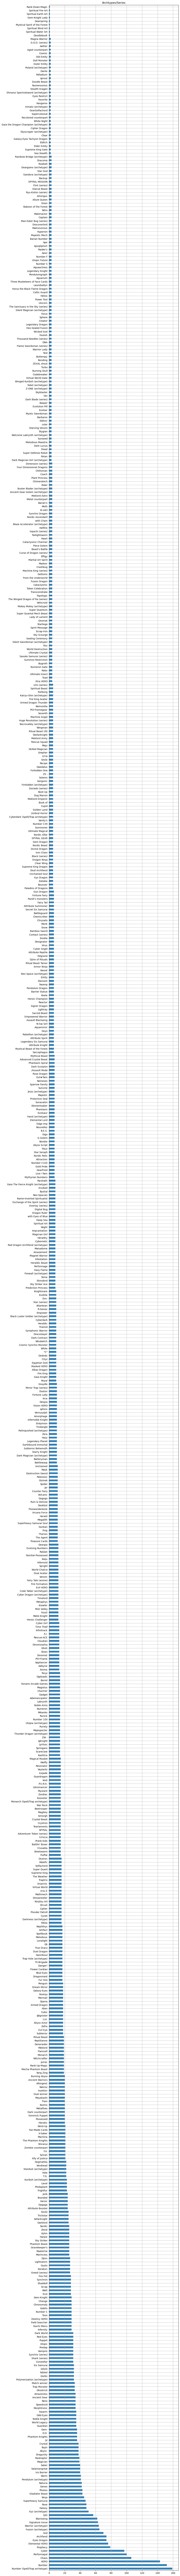

In [77]:
exploded_archseries['Archseries'].value_counts().plot.barh(figsize = (10,200), grid = True, title = 'Archtypes/Series')
plt.show()

### By card type

In [78]:
archseries_crosstab = pd.crosstab(exploded_archseries['Archseries'],exploded_archseries['Card type'], margins = True)
archseries_crosstab

Card type          Monster Card  Spell Card  Trap Card   All
Archseries                                                  
"C"                           9           0          0     9
-Eyes Dragon                 74           0          0    74
/Assault Mode                 7           0          0     7
@Ignister                    18           0          0    18
A-to-Z                       16           0          0    16
...                         ...         ...        ...   ...
sprout                        2           0          0     2
tellarknight                 20           5          0    25
with Chain                    0           0          4     4
with Eyes of Blue             5           3          0     8
All                        7356        1384        911  9651

[720 rows x 4 columns]

### By primary type

In [79]:
archseries_crosstab_b = pd.crosstab(exploded_archseries['Archseries'],exploded_archseries['Primary type'], margins = True)
archseries_crosstab_b

Primary type       Effect Monster  Fusion Monster  Link Monster  \
Archseries                                                        
"C"                             8               0             0   
-Eyes Dragon                   31              11             1   
/Assault Mode                   7               0             0   
@Ignister                      10               1             4   
A-to-Z                          6               8             0   
...                           ...             ...           ...   
sphinx                          9               0             0   
sprout                          2               0             0   
tellarknight                   14               0             0   
with Eyes of Blue               5               0             0   
All                          4729             543           342   

Primary type       Normal Monster  Ritual Monster  Synchro Monster  \
Archseries                                                           
"C"                             1               0                0   
-Eyes Dragon                    4               4                5   
/Assault Mode                   0               0                0   
@Ignister                       0               1                1   
A-to-Z                          2               0                0   
...                           ...             ...              ...   
sphinx                          0               0                0   
sprout                          0               0                0   
tellarknight                    0               0                0   
with Eyes of Blue               0               0                0   
All                           220             127              448   

Primary type       Xyz Monster   All  
Archseries                            
"C"                          0     9  
-Eyes Dragon                18    74  
/Assault Mode                0     7  
@Ignister                    1    18  
A-to-Z                       0    16  
...                        ...   ...  
sphinx                       0     9  
sprout                       0     2  
tellarknight                 6    20  
with Eyes of Blue            0     5  
All                        943  7352  

[655 rows x 8 columns]



### By secondary type

In [80]:
exploded_archseries_secondary_type = exploded_archseries[['Archseries', 'Secondary type']].explode('Secondary type')
archseries_crosstab_c = pd.crosstab(exploded_archseries_secondary_type['Archseries'],exploded_archseries_secondary_type['Secondary type'], margins = True)
archseries_crosstab_c

Secondary type     Flip monster  Gemini monster  Spirit monster  Toon monster  \
Archseries                                                                      
-Eyes Dragon                  0               2               0             2   
@Ignister                     0               0               0             0   
A-to-Z                        0               0               0             0   
Adamancipator                 0               0               0             0   
Alien                         1               1               0             0   
...                         ...             ...             ...           ...   
itsu                          0               0               0             0   
lswarm                        2               0               0             0   
roid                          0               0               0             0   
with Eyes of Blue             0               0               0             0   
All                         128              28              13            36   

Secondary type     Tuner monster  Union monster  All  
Archseries                                            
-Eyes Dragon                   0              0    4  
@Ignister                      1              0    1  
A-to-Z                         0              6    6  
Adamancipator                  3              0    3  
Alien                          1              0    3  
...                          ...            ...  ...  
itsu                           0              2    2  
lswarm                         0              0    2  
roid                           9              0    9  
with Eyes of Blue              5              0    5  
All                          434             18  657  

[202 rows x 7 columns]

### By monster type

In [81]:
archseries_crosstab_d = pd.crosstab(exploded_archseries['Archseries'],exploded_archseries['Monster type'], margins = True)
archseries_crosstab_d

Monster type       Aqua  Beast  Beast-Warrior  Creator God  Cyberse  Dinosaur  \
Archseries                                                                      
"C"                   0      0              0            0        0         0   
-Eyes Dragon          0      0              0            0        0         0   
/Assault Mode         0      0              0            0        0         0   
@Ignister             0      0              0            0       18         0   
A-to-Z                0      0              0            0        0         0   
...                 ...    ...            ...          ...      ...       ...   
sphinx                0      3              0            0        0         0   
sprout                0      0              0            0        0         0   
tellarknight          0      0              0            0        0         0   
with Eyes of Blue     0      0              0            0        0         0   
All                 194    295            186            2      156        90   

Monster type       Divine-Beast  Dragon  Fairy  Fiend  Fish  Insect  Machine  \
Archseries                                                                     
"C"                           0       0      0      0     0       9        0   
-Eyes Dragon                  0      69      0      0     0       0        2   
/Assault Mode                 0       2      0      0     0       0        1   
@Ignister                     0       0      0      0     0       0        0   
A-to-Z                        0       0      0      0     0       0       16   
...                         ...     ...    ...    ...   ...     ...      ...   
sphinx                        0       0      0      0     0       0        0   
sprout                        0       0      0      0     0       0        0   
tellarknight                  0       0      0      1     0       0        0   
with Eyes of Blue             0       0      0      0     0       0        0   
All                          12     732    455    696    75     163      996   

Monster type       Plant  Psychic  Pyro  Reptile  Rock  Sea Serpent  \
Archseries                                                            
"C"                    0        0     0        0     0            0   
-Eyes Dragon           0        0     0        0     0            0   
/Assault Mode          0        1     0        0     0            0   
@Ignister              0        0     0        0     0            0   
A-to-Z                 0        0     0        0     0            0   
...                  ...      ...   ...      ...   ...          ...   
sphinx                 0        0     0        0     6            0   
sprout                 2        0     0        0     0            0   
tellarknight           0        0     0        0     0            0   
with Eyes of Blue      0        0     0        0     0            0   
All                  183      158    96      137   216           71   

Monster type       Spellcaster  Thunder  Warrior  Winged Beast  Wyrm  Zombie  \
Archseries                                                                     
"C"                          0        0        0             0     0       0   
-Eyes Dragon                 0        0        0             0     0       3   
/Assault Mode                1        0        1             0     0       1   
@Ignister                    0        0        0             0     0       0   
A-to-Z                       0        0        0             0     0       0   
...                        ...      ...      ...           ...   ...     ...   
sphinx                       0        0        0             0     0       0   
sprout                       0        0        0             0     0       0   
tellarknight                 1        0       17             0     1       0   
with Eyes of Blue            5        0        0             0     0       0   
All                  

### By property

In [82]:
archseries_crosstab_e = pd.crosstab(exploded_archseries['Archseries'],exploded_archseries['Property'], margins = True)
archseries_crosstab_e

Property           Continuous Spell Card  Continuous Trap Card  \
Archseries                                                       
A.I.                                   1                     3   
Abyss Actor                            0                     0   
Abyss Script                           1                     0   
Abyss-                                 0                     1   
Adamancipator                          0                     0   
...                                  ...                   ...   
sphinx                                 0                     1   
tellarknight                           1                     0   
with Chain                             0                     0   
with Eyes of Blue                      1                     0   
All                                  247                   291   

Property           Counter Trap Card  Equip Spell Card  Field Spell Card  \
Archseries                                                                 
A.I.                               0                 0                 1   
Abyss Actor                        0                 0                 0   
Abyss Script                       0                 0                 0   
Abyss-                             0                 3                 0   
Adamancipator                      1                 0                 1   
...                              ...               ...               ...   
sphinx                             0                 0                 0   
tellarknight                       0                 1                 1   
with Chain                         0                 0                 0   
with Eyes of Blue                  0                 0                 0   
All                               75               133               183   

Property           Normal Spell Card  Normal Trap Card  Quick-Play Spell Card  \
Archseries                                                                      
A.I.                               4                 1                      2   
Abyss Actor                        1                 2                      0   
Abyss Script                       5                 0                      1   
Abyss-                             0                 3                      0   
Adamancipator                      2                 1                      0   
...                              ...               ...                    ...   
sphinx                             0                 0                      0   
tellarknight                       0                 0                      2   
with Chain                         0                 4                      0   
with Eyes of Blue                  0                 0                      2   
All                              518               545                    262   

Property           Ritual Spell Card   All  
Archseries                                  
A.I.                               1    13  
Abyss Actor                        0     3  
Abyss Script                       0     7  
Abyss-                             0     7  
Adamancipator                      0     5  
...                              ...   ...  
sphinx                             0     1  
tellarknight                       0     5  
with Chain                         0     4  
with Eyes of Blue                  0     3  
All                               41  2295  

[403 rows x 10 columns]

## Artworks

In [83]:
print('Total number of cards with edited or alternate artworks:', cards_df['Artwork'].count())

Total number of cards with edited or alternate artworks: 630


In [84]:
cards_df[['Name','Password','TCG status','OCG status','Artwork']][cards_df['Artwork'].notna()]

Name  Password TCG status OCG status    Artwork
16           A Deal with Dark Ruler  06850209  Unlimited  Unlimited  (Edited,)
29      A-to-Z-Dragon Buster Cannon  65172015  Unlimited  Unlimited  (Edited,)
48                     Absolute End  27744077  Unlimited  Unlimited  (Edited,)
52       Absorbing Kid from the Sky  49771608  Unlimited  Unlimited  (Edited,)
62     Abyss Actor - Mellow Madonna  78310590  Unlimited  Unlimited  (Edited,)
...                             ...       ...        ...        ...        ...
12124         Yorishiro of the Aqua  57511992  Unlimited  Unlimited  (Edited,)
12238                       Zombino  14575467  Unlimited  Unlimited  (Edited,)
12240              Zombyra the Dark  88472456  Unlimited  Unlimited  (Edited,)
12242               Zoodiac Barrage  46060017  Forbidden    Limited  (Edited,)
12245            Zoodiac Bunnyblast  04367330  Unlimited  Unlimited  (Edited,)

[630 rows x 5 columns]

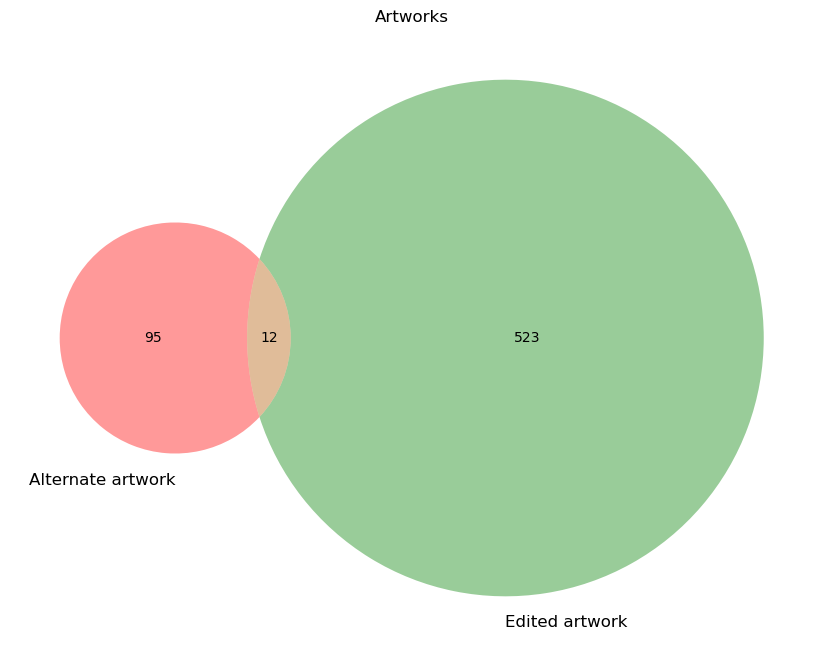

In [85]:
artwork_value_counts = cards_df['Artwork'].value_counts()
plt.figure(figsize=(20,8))
plt.title('Artworks')
venn2(subsets = (artwork_value_counts[('Alternate',)], artwork_value_counts[('Edited',)],artwork_value_counts[('Alternate','Edited')]), set_labels = ('Alternate artwork', 'Edited artwork'))
plt.show()

### By card type

In [86]:
artwork_crosstab = pd.crosstab(cards_df['Artwork'], cards_df['Card type'])
artwork_crosstab

Card type            Monster Card  Spell Card  Trap Card
Artwork                                                 
(Alternate,)                   83           7          5
(Alternate, Edited)            11           1          0
(Edited,)                     296         119        108

### By primary type

In [87]:
artwork_crosstab_b = pd.crosstab(cards_df['Artwork'], cards_df['Primary type'])
artwork_crosstab_b

Primary type         Effect Monster  Fusion Monster  Link Monster  \
Artwork                                                             
(Alternate,)                     36              13             9   
(Alternate, Edited)               3               1             5   
(Edited,)                       193              22            10   

Primary type         Normal Monster  Ritual Monster  Synchro Monster  \
Artwork                                                                
(Alternate,)                     17               0                3   
(Alternate, Edited)               2               0                0   
(Edited,)                        43               7                5   

Primary type         Xyz Monster  
Artwork                           
(Alternate,)                   5  
(Alternate, Edited)            0  
(Edited,)                     16

More granularity is unnecessary

## Errata

In [88]:
print('Total number of cards with name or type errata:', cards_df['Errata'].count())

Total number of cards with name or type errata: 1213


In [89]:
cards_df[['Name','Password','TCG status','OCG status','Errata']][cards_df['Errata'].notna()]

Name  Password TCG status OCG status  \
0        "A" Cell Breeding Device  34541863  Unlimited  Unlimited   
13                    7 Completed  86198326  Unlimited  Unlimited   
16         A Deal with Dark Ruler  06850209  Unlimited  Unlimited   
21              A Legendary Ocean  00295517  Unlimited  Unlimited   
26     A Wingbeat of Giant Dragon  28596933  Unlimited  Unlimited   
...                           ...       ...        ...        ...   
12115               Yellow Gadget  13839120  Unlimited  Unlimited   
12123                   Yomi Ship  51534754  Unlimited  Unlimited   
12156                Z-Metal Tank  64500000  Unlimited  Unlimited   
12180  Zaborg the Thunder Monarch  51945556  Unlimited  Unlimited   
12240            Zombyra the Dark  88472456  Unlimited  Unlimited   

             Errata  
0           (Name,)  
13          (Type,)  
16     (Name, Type)  
21          (Type,)  
26          (Type,)  
...             ...  
12115       (Type,)  
12123       (Type,)  
12156       (Type,)  
12180       (Type,)  
12240       (Name,)  

[1213 rows x 5 columns]

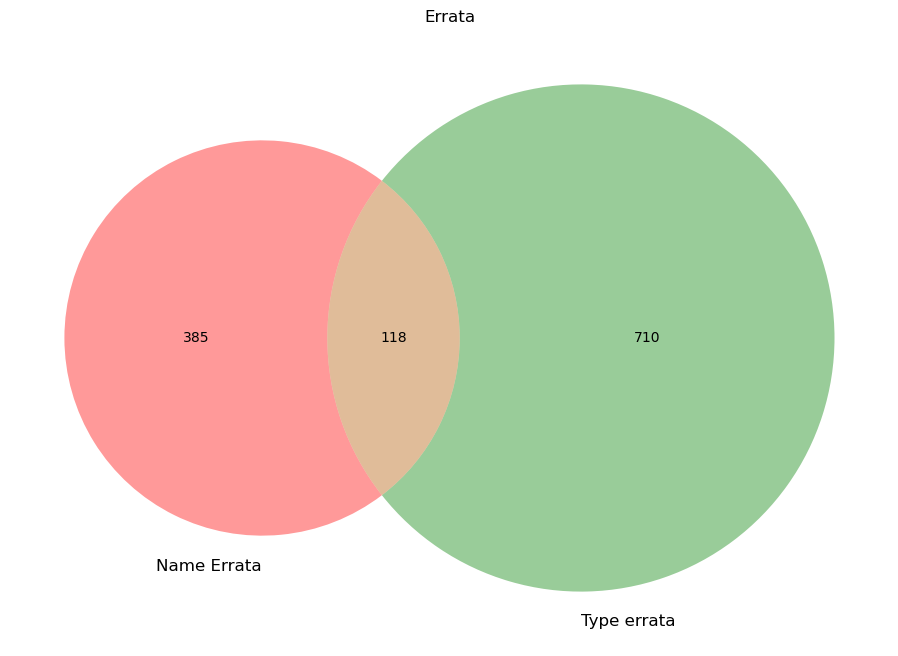

In [90]:
errata_value_counts = cards_df['Errata'].value_counts()
plt.figure(figsize=(20,8))
plt.title('Errata')
venn2(subsets = (errata_value_counts[('Name',)], errata_value_counts[('Type',)],errata_value_counts[('Name','Type')]), set_labels = ('Name Errata', 'Type errata'))
plt.show()

### By card type

In [91]:
errata_crosstab = pd.crosstab(cards_df['Errata'], cards_df['Card type'])
errata_crosstab

Card type     Monster Card  Spell Card  Trap Card
Errata                                           
(Name,)                278          56         51
(Name, Type)            95          21          2
(Type,)                487         213         10

### By primary type

In [92]:
errata_crosstab_b = pd.crosstab(cards_df['Errata'], cards_df['Primary type'])
errata_crosstab_b

Primary type  Effect Monster  Fusion Monster  Link Monster  Normal Monster  \
Errata                                                                       
(Name,)                  177              45             3              34   
(Name, Type)              44               9             0              33   
(Type,)                  314              26             2              98   

Primary type  Ritual Monster  Synchro Monster  Xyz Monster  
Errata                                                      
(Name,)                    2                9            7  
(Name, Type)               3                5            1  
(Type,)                    2               28           17

More granularity is unnecessary

### By artwork

In [93]:
errata_crosstab_c = pd.crosstab(cards_df['Artwork'], cards_df['Errata'])
errata_crosstab_c

Errata               (Name,)  (Name, Type)  (Type,)
Artwork                                            
(Alternate,)               4            20       25
(Alternate, Edited)        0             2        3
(Edited,)                 21            16       59

## TCG & OCG status

### TGC status

In [94]:
print('Total number of TCG status:', cards_df['TCG status'].nunique())

Total number of TCG status: 6


In [95]:
cards_df.groupby('TCG status', dropna=False).nunique()

Name  Password  Card type  Property  Archseries  \
TCG status                                                           
Forbidden           104       104          3         7          58   
Illegal              38         0          3         3           6   
Limited              80        80          3         5          41   
Not yet released     27        27          3         7          15   
Semi-Limited          5         5          3         3           5   
Unlimited         11627     11624          3         9        1156   
NaN                 382       326          3         9          94   

                  Effect type  OCG status  Page URL  Artwork  \
TCG status                                                     
Forbidden                  49           4       104        1   
Illegal                     6           1        38        0   
Limited                    37           4        80        3   
Not yet released           19           1        27        0   
Semi-Limited                5           2         5        0   
Unlimited                 353           5     11629        3   
NaN                        77           3       382        0   

                  Modification date  Errata  Attribute  Primary type  \
TCG status                                                             
Forbidden                       104       3          6             5   
Illegal                          38       1          6             5   
Limited                          80       3          6             6   
Not yet released                 25       0          4             6   
Semi-Limited                      5       1          2             2   
Unlimited                     11530       3          7             7   
NaN                             382       0          7             7   

                  Secondary type  Monster type  Level/Rank  DEF  \
TCG status                                                        
Forbidden                      2            19          12   21   
Illegal                        0            14           5   12   
Limited                        2            15           9   18   
Not yet released               0             5           4    6   
Semi-Limited                   0             2           2    2   
Unlimited                      8            24          14   75   
NaN                            3            24          12   41   

                  Pendulum Scale  Link  Link Arrows  ATK  
TCG status                                                
Forbidden                      2     4           10   27  
Illegal                        2     2            2   11  
Limited                        2     1            1   23  
Not yet released               0     2            2    6  
Semi-Limited                   0     0            0    2  
Unlimited                     13     6           60   80  
NaN                            7     4            5   54

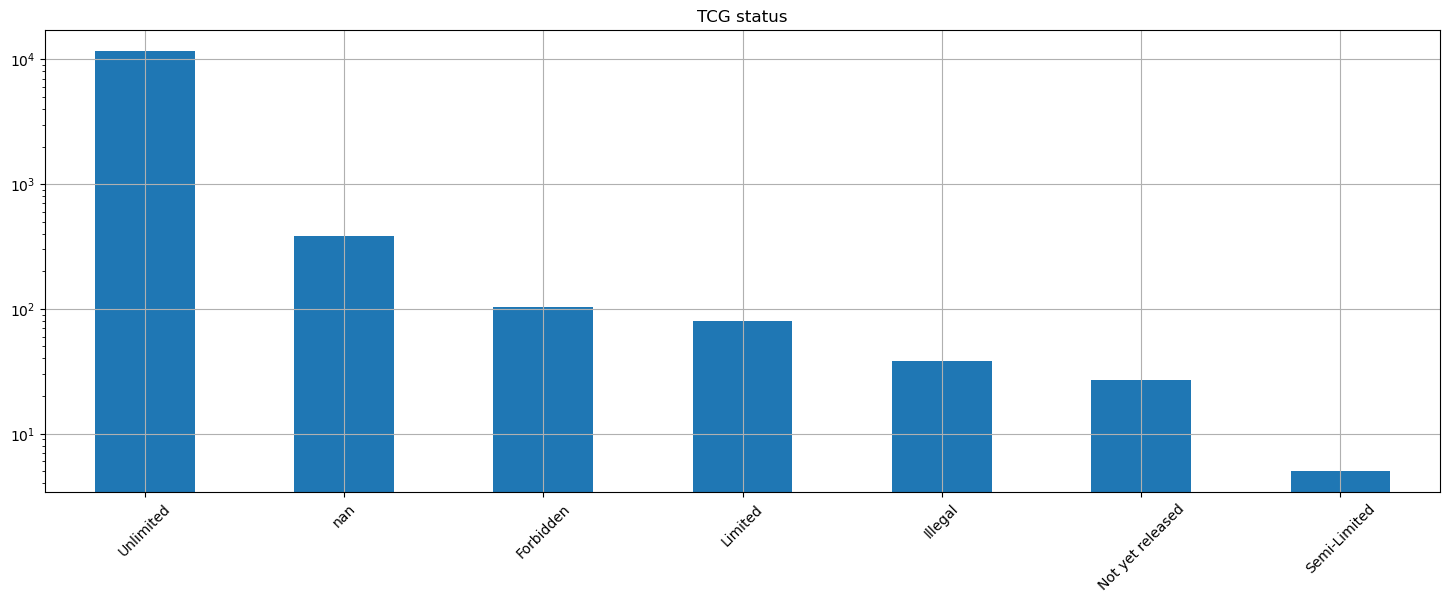

In [96]:
cards_df['TCG status'].value_counts(dropna = False).plot.bar(figsize = (18,6), logy=True, grid = True, rot=45, title = 'TCG status')
plt.show()

#### By card type

In [97]:
# Remove unlimited
tcg_crosstab = pd.crosstab(cards_df['Card type'], cards_df['TCG status']).drop(['Unlimited'], axis=1)
tcg_crosstab

TCG status    Forbidden  Illegal  Limited  Not yet released  Semi-Limited
Card type                                                                
Monster Card         68       35       45                10             2
Spell Card           26        2       33                12             2
Trap Card            10        1        2                 5             1

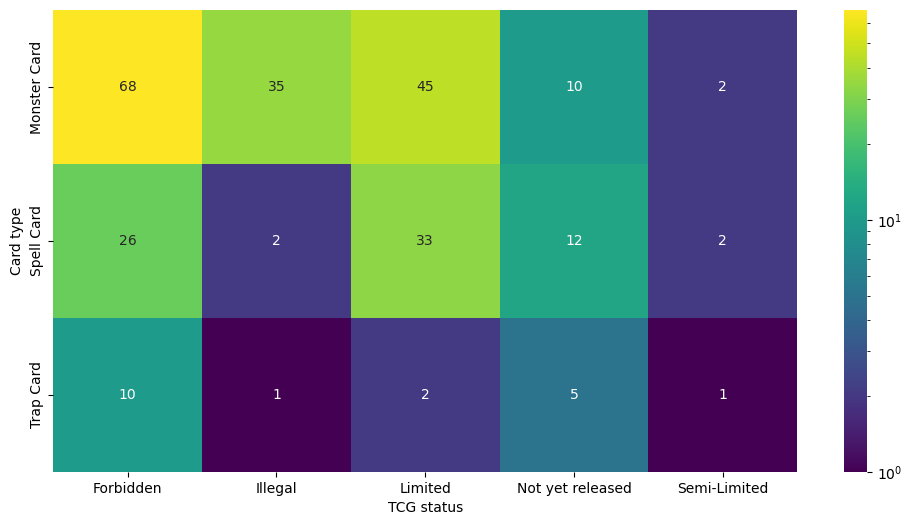

In [98]:
plt.figure(figsize = (12,6))
sns.heatmap(tcg_crosstab[tcg_crosstab>0], annot=True, fmt="g", cmap='viridis', norm=mc.LogNorm())
plt.show()

#### By monster type

In [99]:
# Remove unlimited
tcg_crosstab_b = pd.crosstab(cards_df['Monster type'], cards_df['TCG status']).drop(['Unlimited'], axis=1)
tcg_crosstab_b

TCG status     Forbidden  Illegal  Limited  Not yet released  Semi-Limited
Monster type                                                              
Aqua                   2        0        4                 0             0
Beast                  0        3        2                 0             0
Beast-Warrior          2        3        2                 0             0
Cyberse                2        0        1                 1             0
Dinosaur               0        0        2                 0             0
Divine-Beast           0        3        0                 0             0
Dragon                11        3        6                 2             0
Fairy                  4        4        6                 0             0
Fiend                  5        2        2                 0             0
Fish                   1        0        0                 0             0
Insect                 2        0        0                 2             0
Machine                6        4        4                 0             0
Plant                  6        1        0                 2             0
Psychic                2        1        1                 0             0
Pyro                   0        0        0                 0             0
Reptile                1        0        1                 0             0
Rock                   2        1        4                 0             0
Sea Serpent            1        0        0                 0             0
Spellcaster            8        5        7                 0             0
Thunder                2        1        0                 0             0
Warrior                4        2        2                 3             1
Winged Beast           3        2        1                 0             1
Wyrm                   4        0        0                 0             0
Zombie                 0        0        0                 0             0

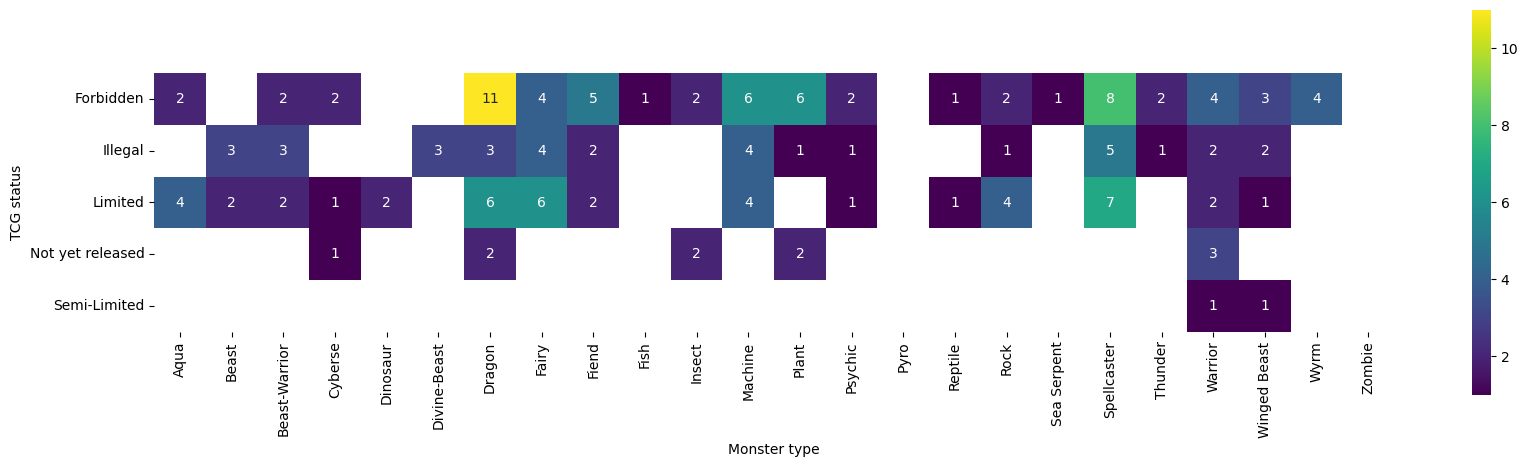

In [100]:
plt.figure(figsize = (20,5))
sns.heatmap(tcg_crosstab_b[tcg_crosstab_b>0].T, annot=True, fmt="g", cmap='viridis', square = True)
plt.show()

#### By archseries

In [101]:
# Remove unlimited
tcg_crosstab_c = pd.crosstab(exploded_archseries['Archseries'].where(exploded_archseries['OCG status']!='Unlimited'), exploded_archseries['TCG status'], margins = True)
tcg_crosstab_c

TCG status                 Forbidden  Illegal  Limited  Semi-Limited  \
Archseries                                                             
-Eyes Dragon                       1        0        0             0   
Adventurer Token (series)          0        0        0             0   
Amazoness                          0        0        0             0   
Attribute Knight                   0        0        1             0   
Barrier Statue                     1        0        0             0   
...                              ...      ...      ...           ...   
Zexal                              1        0        0             0   
Zoodiac                            3        0        1             0   
roid                               0        0        1             0   
tellarknight                       0        0        0             0   
All                               64       39       37             4   

TCG status                 Unlimited  All  
Archseries                                 
-Eyes Dragon                       0    1  
Adventurer Token (series)          2    2  
Amazoness                          1    1  
Attribute Knight                   0    1  
Barrier Statue                     0    1  
...                              ...  ...  
Zexal                              0    1  
Zoodiac                            0    4  
roid                               0    1  
tellarknight                       1    1  
All                               72  216  

[111 rows x 6 columns]

### OCG status

In [102]:
print('Total number of OCG status:', cards_df['OCG status'].nunique())

Total number of OCG status: 6


In [103]:
cards_df.groupby('OCG status', dropna=False).nunique()

Name  Password  Card type  Property  Archseries  \
OCG status                                                           
Forbidden            87        87          3         6          45   
Illegal              32         1          3         2           8   
Limited              76        76          3         6          43   
Not yet released     28         1          3         6           8   
Semi-Limited         23        23          2         4          14   
Unlimited         11964     11936          3         9        1171   
NaN                  49        37          3         6           6   

                  Effect type  TCG status  Page URL  Artwork  \
OCG status                                                     
Forbidden                  40           3        87        1   
Illegal                     8           1        32        0   
Limited                    34           3        76        3   
Not yet released           15           1        28        0   
Semi-Limited               17           4        23        2   
Unlimited                 356           5     11970        3   
NaN                        17           2        49        0   

                  Modification date  Errata  Attribute  Primary type  \
OCG status                                                             
Forbidden                        87       3          6             5   
Illegal                          32       1          6             6   
Limited                          76       2          6             6   
Not yet released                 28       0          6             7   
Semi-Limited                     23       2          4             2   
Unlimited                     11871       3          7             7   
NaN                              49       1          6             5   

                  Secondary type  Monster type  Level/Rank  DEF  \
OCG status                                                        
Forbidden                      3            19          11   21   
Illegal                        1            12           8   15   
Limited                        2            15           9   21   
Not yet released               2             7           8   12   
Semi-Limited                   1             6           4    6   
Unlimited                      8            25          14   76   
NaN                            1            15           6   15   

                  Pendulum Scale  Link  Link Arrows  ATK  
OCG status                                                
Forbidden                      3     4            8   24  
Illegal                        2     2            2   14  
Limited                        3     3            3   21  
Not yet released               0     1            1   17  
Semi-Limited                   0     2            2    8  
Unlimited                     13     6           60   81  
NaN                            0     1            2   14

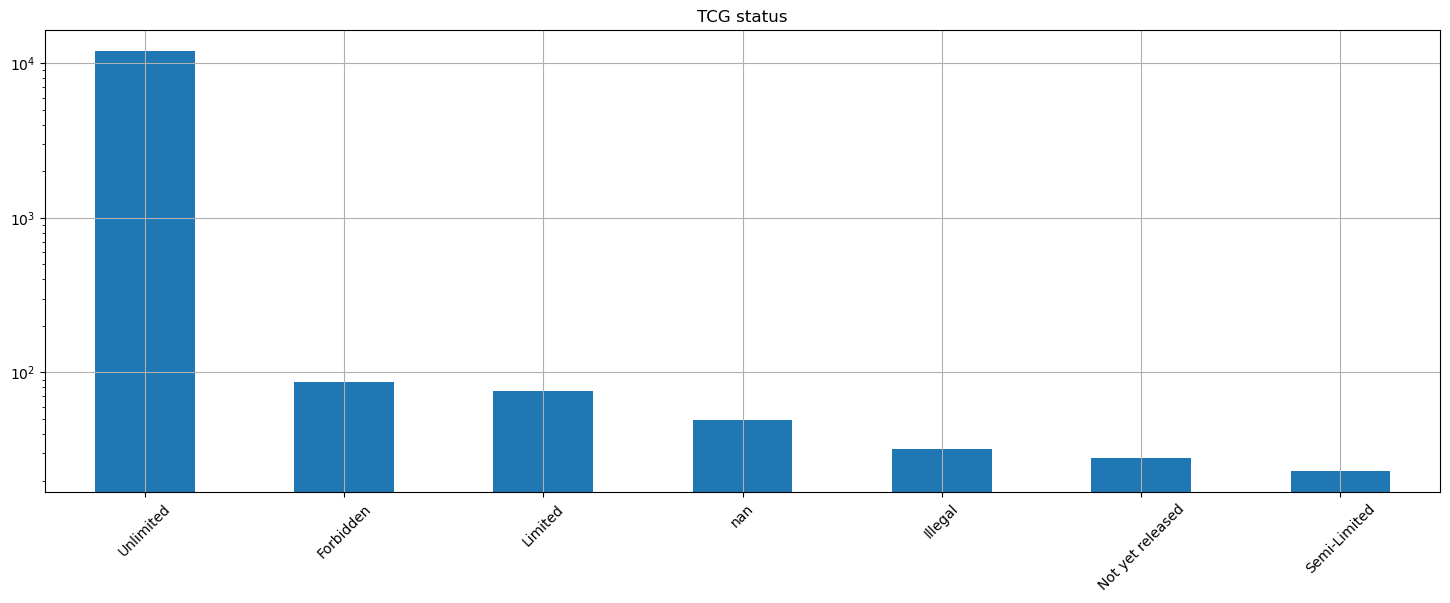

In [104]:
cards_df['OCG status'].value_counts(dropna = False).plot.bar(figsize = (18,6), logy=True, grid = True, rot=45, title = 'TCG status')
plt.show()

#### By card type

In [105]:
# Remove unlimited
ocg_crosstab = pd.crosstab(cards_df['Card type'], cards_df['OCG status']).drop(['Unlimited'], axis=1)
ocg_crosstab

OCG status    Forbidden  Illegal  Limited  Not yet released  Semi-Limited
Card type                                                                
Monster Card         56       30       44                19             8
Spell Card           21        1       29                 6            15
Trap Card            10        1        3                 3             0

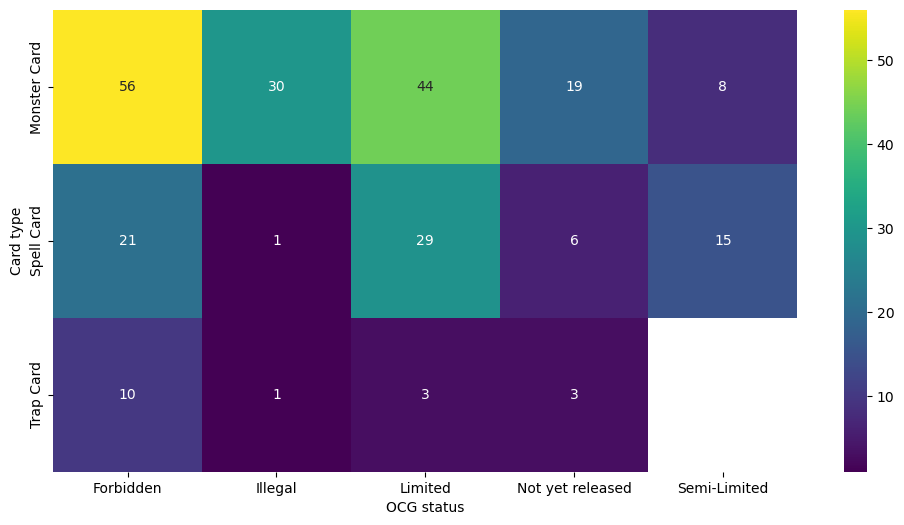

In [106]:
plt.figure(figsize = (12,6))
sns.heatmap(ocg_crosstab[ocg_crosstab>0], annot=True, fmt="g", cmap='viridis')
plt.show()

#### By monster type

In [107]:
ocg_crosstab_b = pd.crosstab(cards_df['Monster type'], cards_df['OCG status']).drop(['Unlimited'], axis=1)
ocg_crosstab_b

OCG status     Forbidden  Illegal  Limited  Not yet released  Semi-Limited
Monster type                                                              
Aqua                   3        0        1                 0             2
Beast                  1        2        0                 0             0
Beast-Warrior          3        2        1                 3             1
Creator God            0        0        0                 0             0
Cyberse                2        0        1                 1             0
Dinosaur               0        0        1                 5             0
Divine-Beast           0        3        0                 0             0
Dragon                 9        3        6                 3             0
Fairy                  2        3        4                 0             0
Fiend                  5        1        0                 0             1
Fish                   1        0        0                 0             0
Insect                 1        0        0                 0             0
Machine                5        3        6                 2             2
Plant                  5        0        1                 0             0
Psychic                1        1        5                 0             0
Pyro                   0        0        1                 0             0
Reptile                1        0        0                 0             0
Rock                   1        1        2                 0             0
Sea Serpent            1        0        0                 0             0
Spellcaster            7        7        8                 1             1
Thunder                0        0        3                 0             0
Warrior                3        3        3                 4             1
Winged Beast           3        1        1                 0             0
Wyrm                   2        0        0                 0             0
Zombie                 0        0        0                 0             0

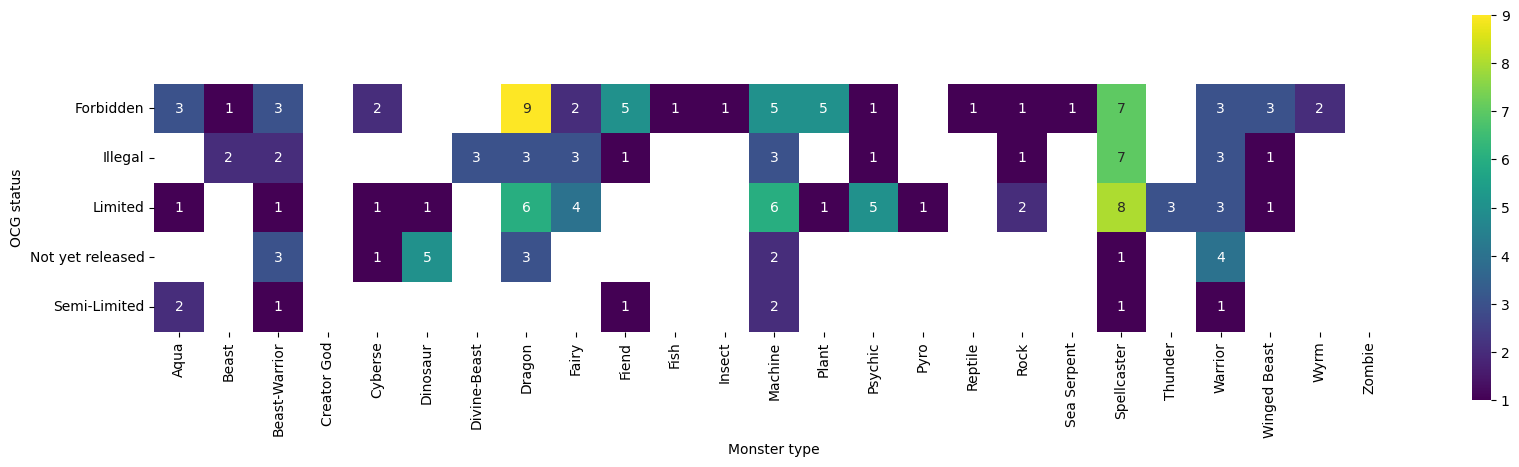

In [108]:
plt.figure(figsize = (20,5))
sns.heatmap(ocg_crosstab_b[ocg_crosstab_b>0].T, annot=True, fmt="g", cmap='viridis', square = True)
plt.show()

#### By archseries

In [109]:
# Remove unlimited
ocg_crosstab_c = pd.crosstab(exploded_archseries['Archseries'].where(exploded_archseries['OCG status']!='Unlimited'), exploded_archseries['OCG status'], margins = True)
ocg_crosstab_c

OCG status                 Forbidden  Illegal  Limited  Not yet released  \
Archseries                                                                 
-Eyes Dragon                       1        0        0                 0   
Adventurer Token (series)          1        0        0                 0   
Amazoness                          1        0        0                 0   
Attribute Knight                   0        0        1                 0   
Barrier Statue                     1        0        0                 0   
...                              ...      ...      ...               ...   
Zexal                              1        0        0                 0   
Zoodiac                            2        0        2                 0   
roid                               0        0        1                 0   
tellarknight                       0        0        1                 0   
All                               72       33       65                25   

OCG status                 Semi-Limited  All  
Archseries                                    
-Eyes Dragon                          0    1  
Adventurer Token (series)             1    2  
Amazoness                             0    1  
Attribute Knight                      0    1  
Barrier Statue                        0    1  
...                                 ...  ...  
Zexal                                 0    1  
Zoodiac                               0    4  
roid                                  0    1  
tellarknight                          0    1  
All                                  17  212  

[117 rows x 6 columns]

### TCG vs. OCG status

In [110]:
cg_crosstab = pd.crosstab(cards_df['OCG status'],cards_df['TCG status'], dropna=False, margins = False)
cg_crosstab

TCG status        Forbidden  Illegal  Limited  Not yet released  Semi-Limited  \
OCG status                                                                      
Forbidden                72        0        4                 0             0   
Illegal                   0       26        0                 0             0   
Limited                   8        0       40                 0             0   
Not yet released          0        0        0                 0             0   
Semi-Limited              1        0        4                 0             3   
Unlimited                23        0       32                27             2   

TCG status        Unlimited  
OCG status                   
Forbidden                11  
Illegal                   0  
Limited                  28  
Not yet released          1  
Semi-Limited             15  
Unlimited             11538

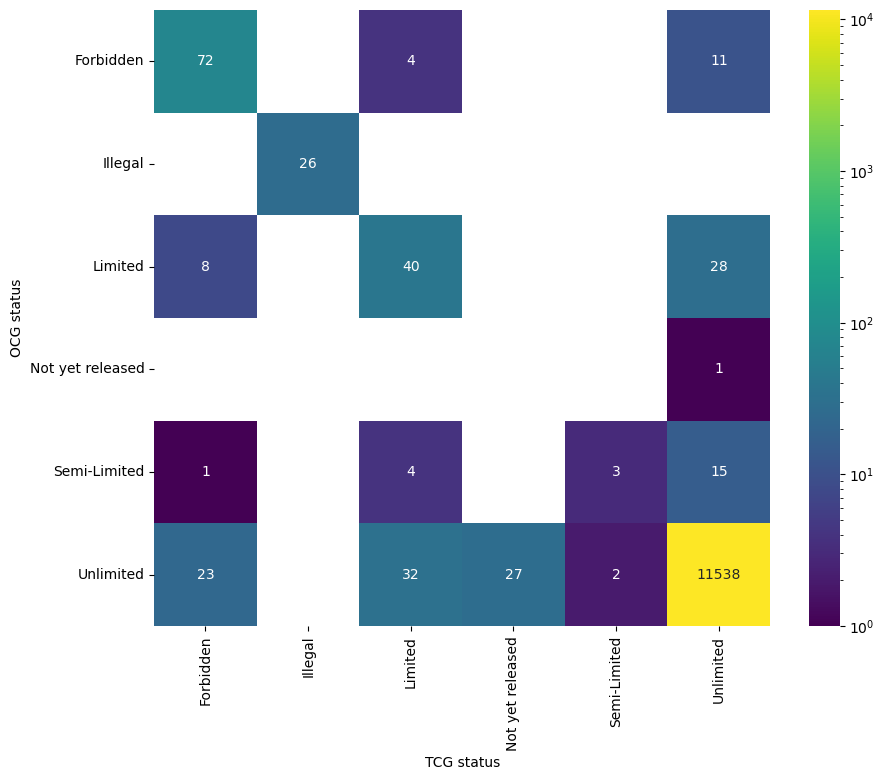

In [111]:
plt.figure(figsize = (10,8))
sns.heatmap(cg_crosstab[cg_crosstab>0], annot=True, fmt="g", cmap='viridis', square=True, norm=mc.LogNorm())
plt.show()

# Extras

## Multiple secondary types

In [112]:
cards_df.dropna(subset='Secondary type', axis=0)[[len(x)>1 for x in cards_df['Secondary type'].dropna()]]

Name  Password     Card type Property  \
9234                   Scapeghost  67284107  Monster Card      NaN   
9399               Shaddoll Falco  37445295  Monster Card      NaN   
11014            Torque Tune Gear  79538761  Monster Card      NaN   
11222  Turbo-Tainted Hot Rod GT19  16769305  Monster Card      NaN   

                  Archseries  \
9234   (Zombie counterpart,)   
9399             (Shaddoll,)   
11014                    NaN   
11222                    NaN   

                                             Effect type TCG status  \
9234                                      (Flip effect,)  Unlimited   
9399            (Condition, Flip effect, Trigger Effect)  Unlimited   
11014  (Continuous-like Effect, Ignition Effect, Igni...  Unlimited   
11222          (Condition, Quick Effect, Trigger Effect)  Unlimited   

      OCG status                                           Page URL Artwork  \
9234   Unlimited              https://yugipedia.com/wiki/Scapeghost     NaN   
9399   Unlimited          https://yugipedia.com/wiki/Shaddoll_Falco     NaN   
11014  Unlimited        https://yugipedia.com/wiki/Torque_Tune_Gear     NaN   
11222  Unlimited  https://yugipedia.com/wiki/Turbo-Tainted_Hot_R...     NaN   

        Modification date Errata Attribute    Primary type  \
9234  2021-11-01 01:07:12    NaN      DARK  Effect Monster   
9399  2021-05-16 16:34:34    NaN      DARK  Effect Monster   
11014 2022-07-24 09:51:16    NaN     LIGHT  Effect Monster   
11222 2023-01-26 17:36:07    NaN      FIRE  Effect Monster   

                       Secondary type Monster type Level/Rank   DEF  \
9234    (Flip monster, Tuner monster)       Zombie          1     0   
9399    (Flip monster, Tuner monster)  Spellcaster          2  1400   
11014  (Tuner monster, Union monster)      Machine          1     0   
11222   (Flip monster, Tuner monster)      Machine          3  1500   

      Pendulum Scale Link Link Arrows  ATK  
9234             NaN  NaN         NaN    0  
9399             NaN  NaN         NaN  600  
11014            NaN  NaN         NaN    0  
11222            NaN  NaN         NaN  500

## Not yet released

In [113]:
cards_df.loc[cards_df['OCG status'] == 'Not yet released'].loc[full_df['TCG status'] == 'Not yet released']

Empty DataFrame
Columns: [Name, Password, Card type, Property, Archseries, Effect type, TCG status, OCG status, Page URL, Artwork, Modification date, Errata, Attribute, Primary type, Secondary type, Monster type, Level/Rank, DEF, Pendulum Scale, Link, Link Arrows, ATK]
Index: []

## Counters and Tokens

In [114]:
counter_df.dropna(how='all',axis=1)

Name     Card type  \
0                                Albaz the Shrouded       Counter   
1                               Aluber the Dogmatic       Counter   
2                                Ancient Gear Token  Monster Card   
3                             Black Feather Counter       Counter   
4                                 Black Sheep Token  Monster Card   
5                                           Counter       Counter   
6                                    Crystron Token  Monster Card   
7                                   Dark Soul Token  Monster Card   
8                                      Doppel Token  Monster Card   
9                                 Dragon Lord Token  Monster Card   
10                                  Dragonoid Token  Monster Card   
11                         Dual Avatar Spirit Token  Monster Card   
12                              Ecclesia the Exiled       Counter   
13                       Emissary of Darkness Token  Monster Card   
14                                    Emperor's Key       Counter   
15                                      Fluff Token  Monster Card   
16                                    G Golem Token  Monster Card   
17                                     Gadget Token  Monster Card   
18                                 Generaider Token  Monster Card   
19                                    Grinder Token  Monster Card   
20                                      Hippo Token  Monster Card   
21                                Ice Barrier Token  Monster Card   
22                                  Infernoid Token  Monster Card   
23  Jesse Anderson - Bonder with the Crystal Beasts       Counter   
24           Jesse and Ruby - Unleashing the Legend       Counter   
25                                   Jurraegg Token  Monster Card   
26                                    Kuriboh Token  Monster Card   
27                                       Lamb Token  Monster Card   
28                                       Mask Token  Monster Card   
29                        Mecha Phantom Beast Token  Monster Card   
30                                   Ogdoadic Token  Monster Card   
31                                      Ojama Token  Monster Card   
32                                   Phantasm Token  Monster Card   
33                          Phantasmal Martyr Token  Monster Card   
34                                     Photon Token  Monster Card   
35                                 Predator Counter       Counter   
36                               Primal Being Token  Monster Card   
37                                      Sheep Token  Monster Card   
38                                  Shinobird Token  Monster Card   
39                            Sky Striker Ace Token  Monster Card   
40                                 Skyblaster Token  Monster Card   
41                                      Slime Token  Monster Card   
42                                    Spell Counter       Counter   
43                                   Synchron Token  Monster Card   
44                         Synthetic Seraphim Token  Monster Card   
45                             The Virtuous Vestals       Counter   
46                                    Torment Token  Monster Card   
47                                      Tri-Brigade       Counter   
48                                  Trickstar Token  Monster Card   
49                                    Wedge Counter       Counter   
50                               World Legacy Token  Monster Card   

                              Archseries TCG status OCG status  \
0                                    NaN      Legal      Legal   
1                                    NaN      Legal      Legal   
2                        (Ancient Gear,)      Legal      Legal   
3                                    NaN      Legal      Legal   
4                  (Zombie counterpart,)        NaN      Legal   
5                                    NaN        NaN      Legal

# Epilogue

In [115]:
footer()

<div align='right'>
    Execution completed 16/02/2023 17:40 UTC
</div>

## HTML export

In [116]:
# Save notebook on disck before generating HTML report
save_notebook()

Notebook saved to disk


In [117]:
! jupyter nbconvert Cards.ipynb --output-dir='../' --to=HTML --TagRemovePreprocessor.enabled=True --TagRemovePreprocessor.remove_cell_tags='exclude' --TemplateExporter.exclude_input=True --TemplateExporter.exclude_input_prompt=True --TemplateExporter.exclude_output_prompt=True

[NbConvertApp] Converting notebook Cards.ipynb to HTML


[NbConvertApp] Writing 4465366 bytes to ../Cards.html


## Git

In [ ]:
! git add "../*[Cc]ards*"

In [ ]:
! git commit -m {"'Cards update-" + timestamp.isoformat() + "'"}